In [ ]:
print("DATAVERSE MODEL TRAINING")

In [1]:
import pandas as pd

df1 = pd.read_excel("Data/Country-Code.xlsx")
df2 = pd.read_csv("Data/Foodora Data.csv", encoding="latin1")

print(df1.head())
print(df2.head())

print(df1.shape)
print(df2.shape)


   Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia
   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Localit

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df = pd.read_csv("Data/Foodora Data.csv", encoding="latin1")


cleaning (important for clean visuals)

In [9]:
df = df[df["Aggregate rating"] > 0]
df = df[df["Votes"] > 0]


City vs Average Rating (Bar Chart)

📌 Columns used
-> City
-> Aggregate rating

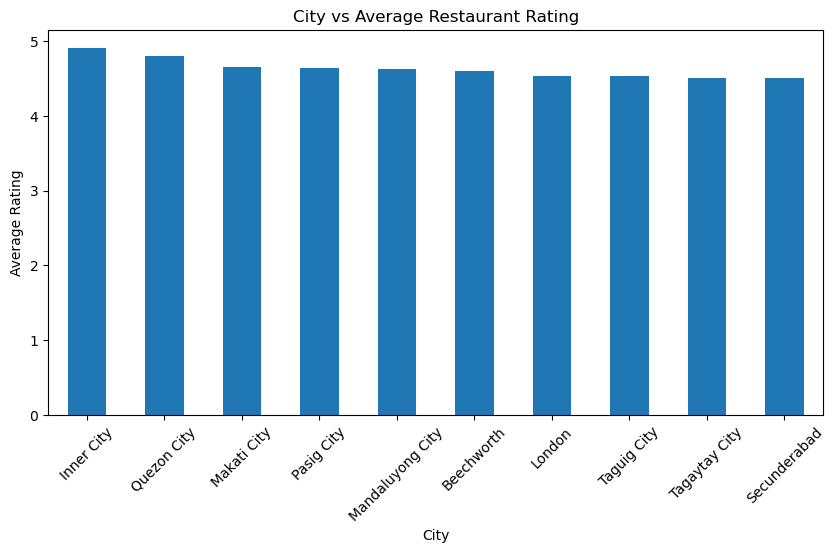

In [10]:
city_rating = (
    df.groupby("City")["Aggregate rating"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,5))
city_rating.plot(kind="bar")
plt.title("City vs Average Restaurant Rating")
plt.xlabel("City")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


Votes vs Ratings (Scatter Plot – Popularity Trap)

📌 Columns used
-> Aggregate rating
-> Votes

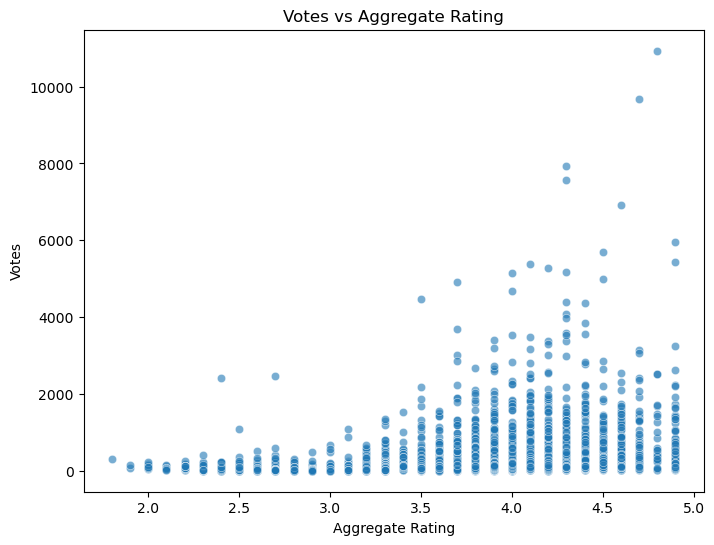

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Aggregate rating",
    y="Votes",
    alpha=0.6
)

plt.title("Votes vs Aggregate Rating")
plt.xlabel("Aggregate Rating")
plt.ylabel("Votes")
plt.show()


Cuisine Popularity vs Satisfaction (Bubble Chart)

📌 Columns used
-> Cuisines
-> Aggregate rating
-> Restaurant ID

In [12]:
cuisine_df = df.copy()
cuisine_df["Cuisines"] = cuisine_df["Cuisines"].str.split(", ")
cuisine_df = cuisine_df.explode("Cuisines")


In [13]:
cuisine_stats = cuisine_df.groupby("Cuisines").agg(
    avg_rating=("Aggregate rating", "mean"),
    restaurant_count=("Restaurant ID", "count")
).reset_index()


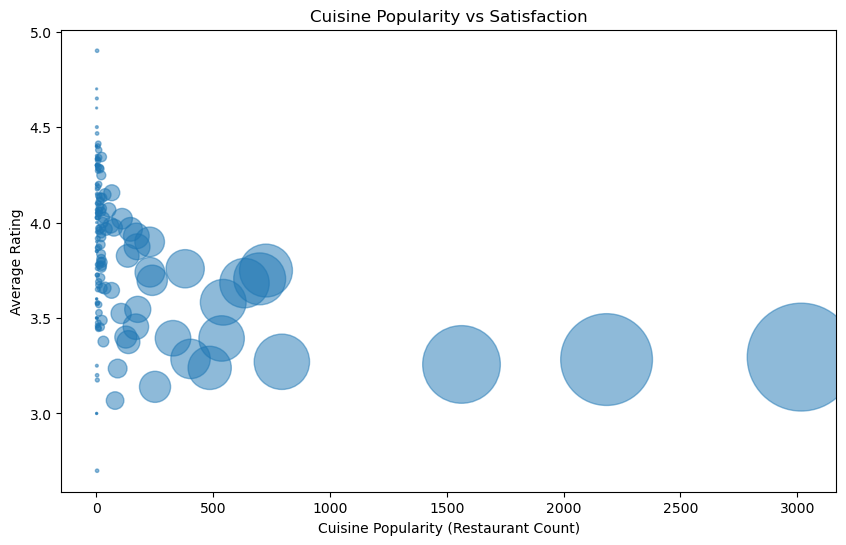

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(
    cuisine_stats["restaurant_count"],
    cuisine_stats["avg_rating"],
    s=cuisine_stats["restaurant_count"]*2,
    alpha=0.5
)

plt.xlabel("Cuisine Popularity (Restaurant Count)")
plt.ylabel("Average Rating")
plt.title("Cuisine Popularity vs Satisfaction")
plt.show()


Price Range vs Ratings (Box Plot)

📌 Columns used
-> Price range
-> Aggregate rating

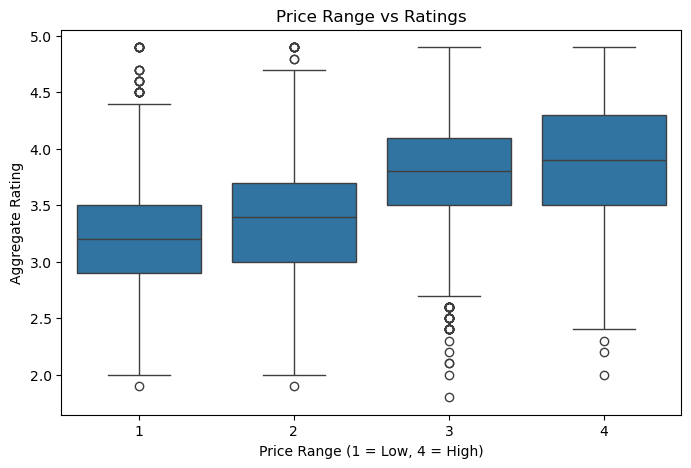

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df,
    x="Price range",
    y="Aggregate rating"
)

plt.title("Price Range vs Ratings")
plt.xlabel("Price Range (1 = Low, 4 = High)")
plt.ylabel("Aggregate Rating")
plt.show()


Delivery Adoption by City (Stacked Bar Chart)

📌 Columns used
-> City
-> Has Online delivery

In [16]:
delivery_city = pd.crosstab(
    df["City"],
    df["Has Online delivery"]
)

delivery_city = delivery_city.head(10)


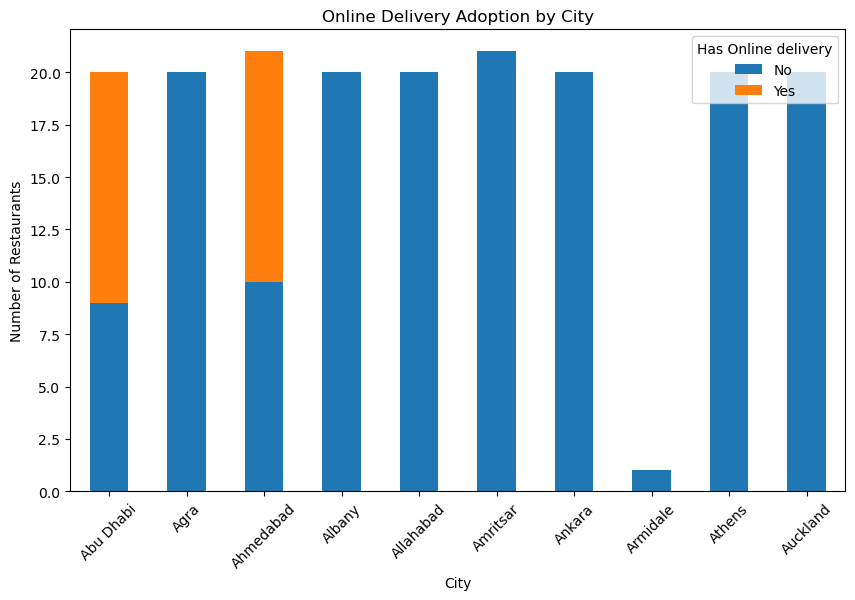

In [17]:
delivery_city.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)

plt.title("Online Delivery Adoption by City")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()


In [8]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


try:
    df = pd.read_csv("Foodora Data.csv", encoding="latin-1")
    df_country = pd.read_excel("Country-Code.xlsx")
except FileNotFoundError:
    
    df = pd.read_csv("Data/Foodora Data.csv", encoding="latin-1")
    df_country = pd.read_excel("Data/Country-Code.xlsx")


df = pd.merge(df, df_country, on='Country Code', how='left')
print("Data Loaded Successfully!")


binary_cols = ['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for col in binary_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)

le = LabelEncoder()
df['Country_Code_Encoded'] = le.fit_transform(df['Country'])


features = ['Votes', 'Price range', 'Has Table booking', 'Has Online delivery', 'Country_Code_Encoded']
target = 'Aggregate rating'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)


print(f"Model Accuracy: {model.score(X_test, y_test):.4f}")


Data Loaded Successfully!
Model Accuracy: 0.9506


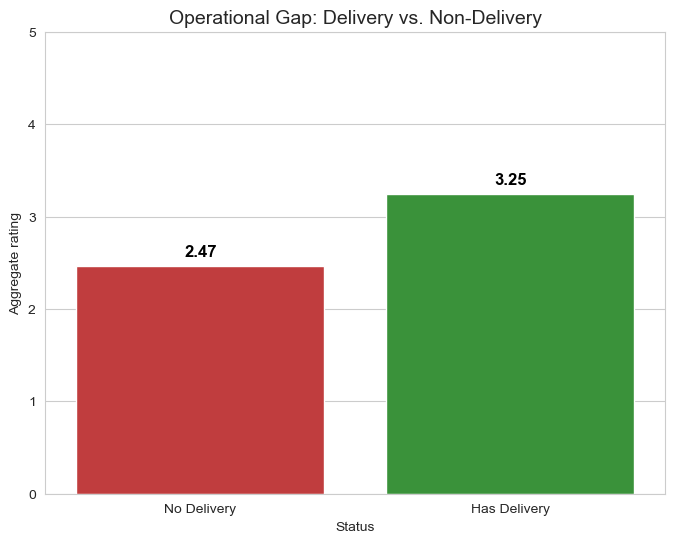

In [12]:

plt.figure(figsize=(8, 6))
avg_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
avg_delivery['Status'] = ['No Delivery', 'Has Delivery']

sns.barplot(
    data=avg_delivery, 
    x='Status', 
    y='Aggregate rating', 
    hue='Status',                # <--- The Fix
    palette=['#d62728', '#2ca02c'], 
    legend=False                 # <--- The Fix
)

plt.title('Operational Gap: Delivery vs. Non-Delivery', fontsize=14)
plt.ylim(0, 5)

for index, row in avg_delivery.iterrows():
    plt.text(index, row['Aggregate rating'] + 0.1, 
             f"{row['Aggregate rating']:.2f}", 
             color='black', ha="center", fontsize=12, weight='bold')
plt.show()

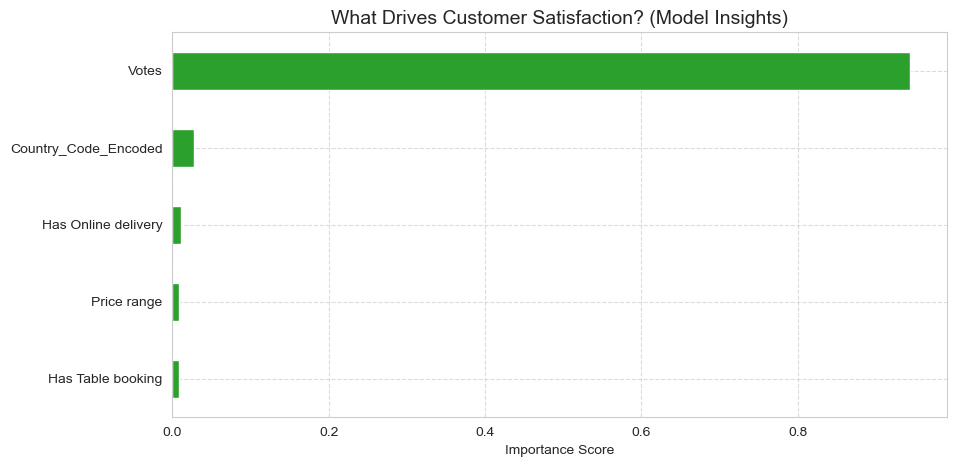

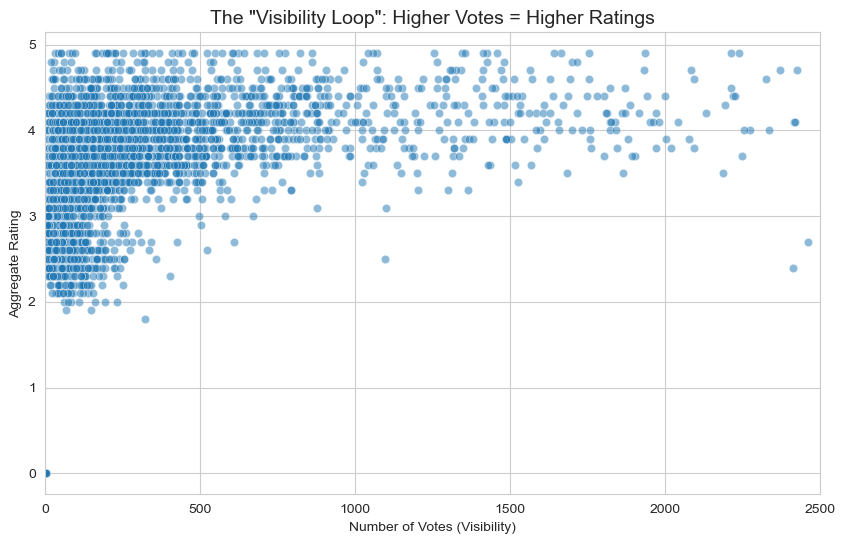

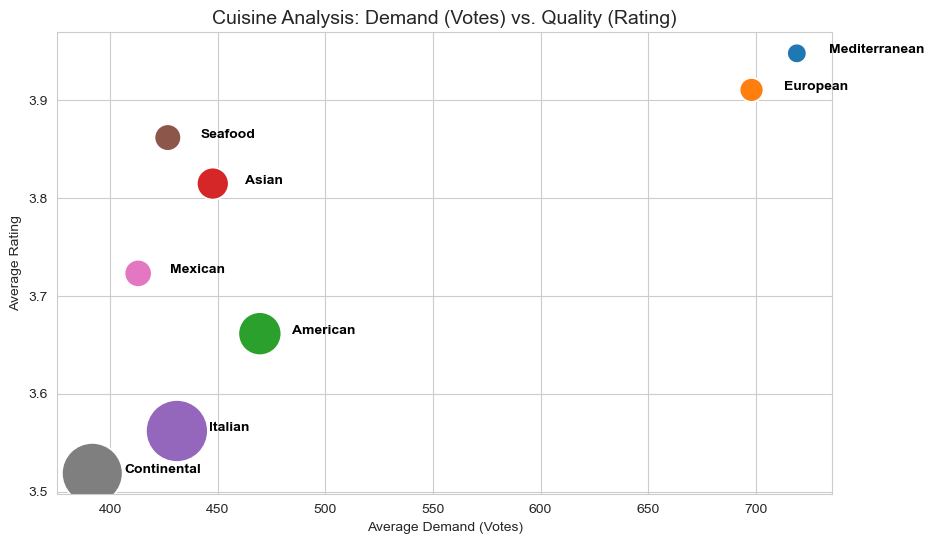

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
features = ['Votes', 'Price range', 'Has Table booking', 'Has Online delivery', 'Country_Code_Encoded']
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)


importances.plot(kind='barh', color='#2ca02c') # Foodora Green
plt.title('What Drives Customer Satisfaction? (Model Insights)', fontsize=14)
plt.xlabel('Importance Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.5, color='#1f77b4')

plt.title('The "Visibility Loop": Higher Votes = Higher Ratings', fontsize=14)
plt.xlabel('Number of Votes (Visibility)')
plt.ylabel('Aggregate Rating')
plt.xlim(0, 2500) 
plt.show()


df_cuisines = df.copy()

df_cuisines['Cuisines'] = df_cuisines['Cuisines'].astype(str).apply(lambda x: x.split(', '))

df_exploded = df_cuisines.explode('Cuisines')

cuisine_stats = df_exploded.groupby('Cuisines').agg({
    'Votes': 'mean', 
    'Aggregate rating': 'mean', 
    'Restaurant ID': 'count'
}).reset_index()

top_cuisines = cuisine_stats[cuisine_stats['Restaurant ID'] > 100].sort_values(by='Votes', ascending=False).head(8)

plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=top_cuisines, 
    x='Votes', 
    y='Aggregate rating', 
    size='Restaurant ID', 
    sizes=(200, 2000), 
    hue='Cuisines', 
    legend=False
)


for i in range(top_cuisines.shape[0]):
    plt.text(
        top_cuisines.Votes.iloc[i]+15, 
        top_cuisines['Aggregate rating'].iloc[i], 
        top_cuisines.Cuisines.iloc[i], 
        weight='bold',
        color='black'
    )

plt.title('Cuisine Analysis: Demand (Votes) vs. Quality (Rating)', fontsize=14)
plt.xlabel('Average Demand (Votes)')
plt.ylabel('Average Rating')
plt.show()

In [3]:
import pandas as pd

df = pd.read_csv("Data/Foodora Data.csv", encoding="latin1")


In [4]:
# Total number of restaurants
total_restaurants = df['Restaurant ID'].nunique()

# Total number of cities
total_cities = df['City'].nunique()

# Total number of cuisines
df_cuisines = df.copy()
df_cuisines['Cuisines'] = df_cuisines['Cuisines'].astype(str).str.split(', ')
total_cuisines = df_cuisines.explode('Cuisines')['Cuisines'].nunique()

total_restaurants, total_cities, total_cuisines


(9551, 141, 146)

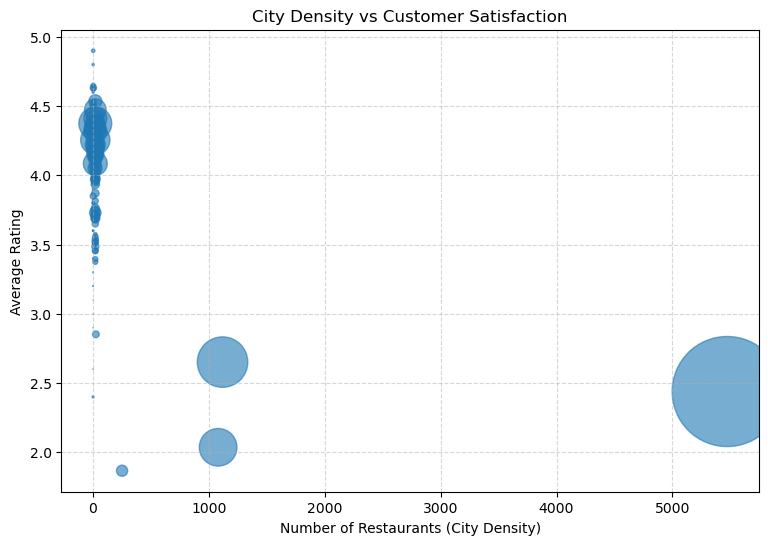

In [5]:
import matplotlib.pyplot as plt

# Aggregate city-level metrics
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique'),
    total_votes=('Votes', 'sum')
).reset_index()

# Scatter plot
plt.figure(figsize=(9, 6))
plt.scatter(
    city_stats['restaurant_count'],
    city_stats['avg_rating'],
    s=city_stats['total_votes'] / 100,  # bubble size = visibility
    alpha=0.6
)

plt.xlabel('Number of Restaurants (City Density)')
plt.ylabel('Average Rating')
plt.title('City Density vs Customer Satisfaction')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_19232\1471953354.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_stats = city_stats.groupby('City_Type').agg(


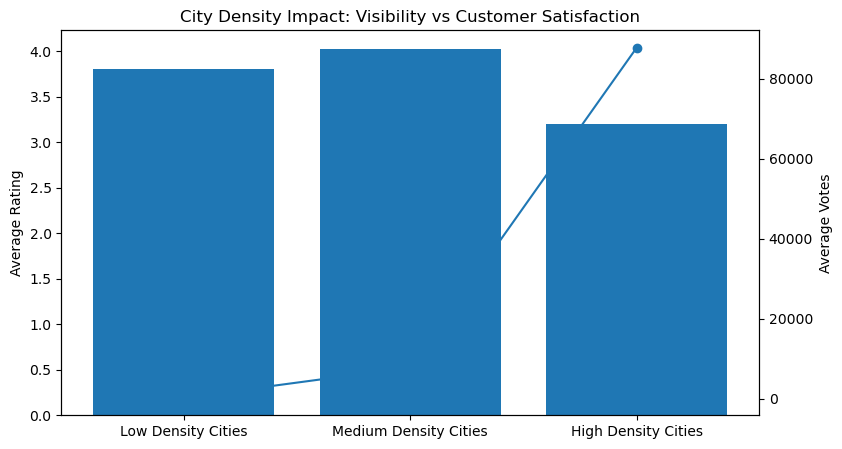

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# City-level aggregation
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Create city density buckets
city_stats['City_Type'] = pd.qcut(
    city_stats['restaurant_count'],
    q=3,
    labels=['Low Density Cities', 'Medium Density Cities', 'High Density Cities']
)

# Aggregate by city type
bucket_stats = city_stats.groupby('City_Type').agg(
    avg_rating=('avg_rating', 'mean'),
    avg_votes=('total_votes', 'mean')
).reset_index()

# Plot
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.bar(bucket_stats['City_Type'], bucket_stats['avg_rating'])
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
ax2.plot(bucket_stats['City_Type'], bucket_stats['avg_votes'], marker='o')
ax2.set_ylabel('Average Votes')

plt.title('City Density Impact: Visibility vs Customer Satisfaction')
plt.show()


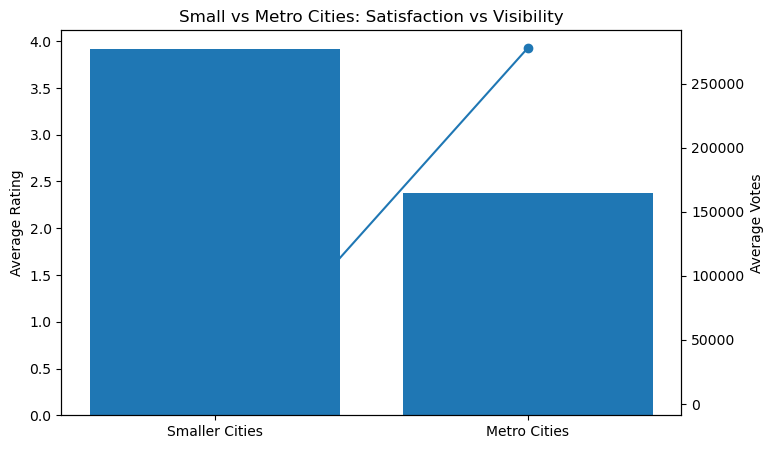

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# City-level stats
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Define business-driven thresholds
small_cities = city_stats[city_stats['restaurant_count'] < 300]
metro_cities = city_stats[city_stats['restaurant_count'] > 1000]

comparison = pd.DataFrame({
    'City Type': ['Smaller Cities', 'Metro Cities'],
    'Average Rating': [
        small_cities['avg_rating'].mean(),
        metro_cities['avg_rating'].mean()
    ],
    'Average Votes': [
        small_cities['total_votes'].mean(),
        metro_cities['total_votes'].mean()
    ]
})

# Plot
fig, ax1 = plt.subplots(figsize=(8,5))

ax1.bar(comparison['City Type'], comparison['Average Rating'])
ax1.set_ylabel('Average Rating')

ax2 = ax1.twinx()
ax2.plot(comparison['City Type'], comparison['Average Votes'], marker='o')
ax2.set_ylabel('Average Votes')

plt.title('Small vs Metro Cities: Satisfaction vs Visibility')
plt.show()


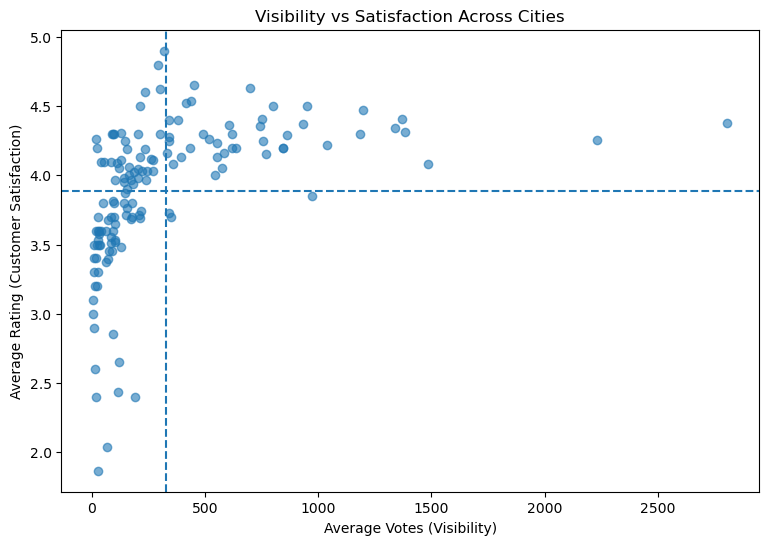

In [8]:
import matplotlib.pyplot as plt

# City-level aggregation
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    avg_votes=('Votes', 'mean')
).reset_index()

# Scatter plot
plt.figure(figsize=(9,6))
plt.scatter(city_stats['avg_votes'], city_stats['avg_rating'], alpha=0.6)

# Reference lines (global averages)
plt.axhline(city_stats['avg_rating'].mean(), linestyle='--')
plt.axvline(city_stats['avg_votes'].mean(), linestyle='--')

plt.xlabel('Average Votes (Visibility)')
plt.ylabel('Average Rating (Customer Satisfaction)')
plt.title('Visibility vs Satisfaction Across Cities')

plt.show()


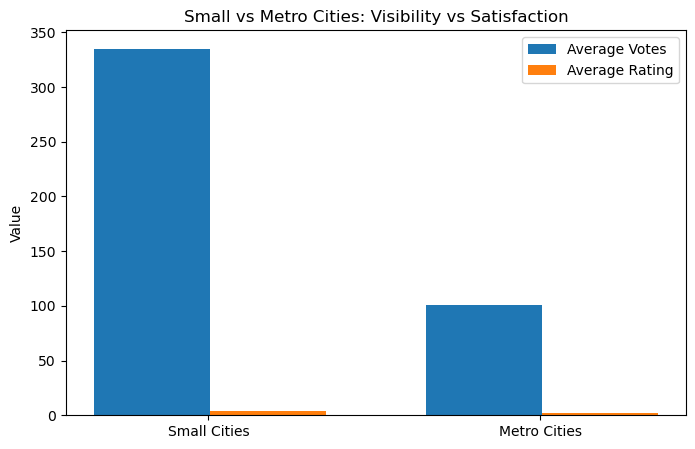

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate city-level stats
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    avg_votes=('Votes', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Define business logic for city types
small_cities = city_stats[city_stats['restaurant_count'] < 300]
metro_cities = city_stats[city_stats['restaurant_count'] > 1000]

comparison = pd.DataFrame({
    'City Type': ['Small Cities', 'Metro Cities'],
    'Average Votes': [
        small_cities['avg_votes'].mean(),
        metro_cities['avg_votes'].mean()
    ],
    'Average Rating': [
        small_cities['avg_rating'].mean(),
        metro_cities['avg_rating'].mean()
    ]
})

# Plot
fig, ax = plt.subplots(figsize=(8,5))

x = range(len(comparison))
ax.bar(x, comparison['Average Votes'], width=0.35, label='Average Votes')
ax.bar([i + 0.35 for i in x], comparison['Average Rating'], width=0.35, label='Average Rating')

ax.set_xticks([i + 0.17 for i in x])
ax.set_xticklabels(comparison['City Type'])
ax.set_ylabel('Value')
ax.set_title('Small vs Metro Cities: Visibility vs Satisfaction')
ax.legend()

plt.show()


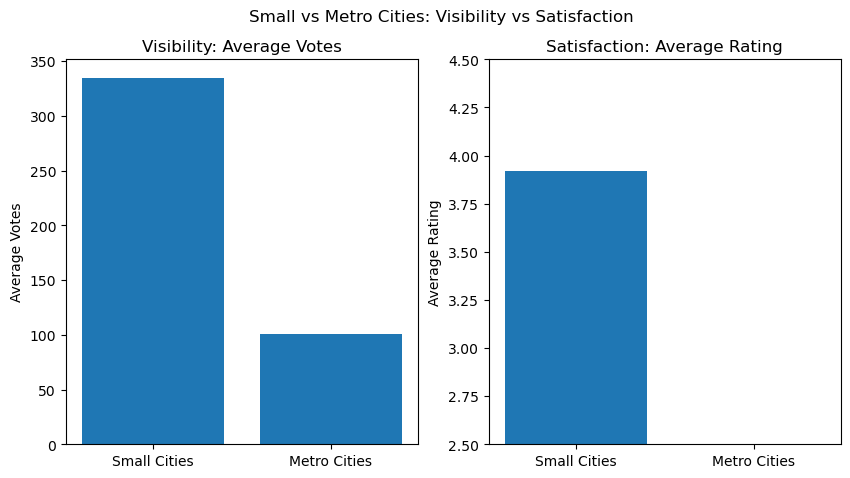

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# City-level aggregation
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    avg_votes=('Votes', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Business-defined city types
small = city_stats[city_stats['restaurant_count'] < 300]
metro = city_stats[city_stats['restaurant_count'] > 1000]

labels = ['Small Cities', 'Metro Cities']
avg_votes = [small['avg_votes'].mean(), metro['avg_votes'].mean()]
avg_ratings = [small['avg_rating'].mean(), metro['avg_rating'].mean()]

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Votes chart
axes[0].bar(labels, avg_votes)
axes[0].set_title('Visibility: Average Votes')
axes[0].set_ylabel('Average Votes')

# Ratings chart
axes[1].bar(labels, avg_ratings)
axes[1].set_title('Satisfaction: Average Rating')
axes[1].set_ylim(2.5, 4.5)  # zoomed scale for clarity
axes[1].set_ylabel('Average Rating')

plt.suptitle('Small vs Metro Cities: Visibility vs Satisfaction')
plt.show()


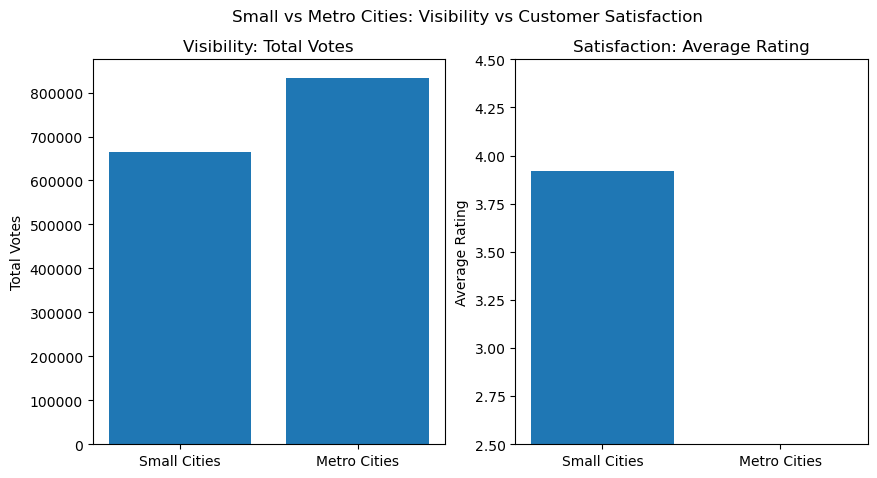

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# City-level aggregation
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Business-defined city groups
small_cities = city_stats[city_stats['restaurant_count'] < 300]
metro_cities = city_stats[city_stats['restaurant_count'] > 1000]

comparison = pd.DataFrame({
    'City Type': ['Small Cities', 'Metro Cities'],
    'Total Votes': [
        small_cities['total_votes'].sum(),
        metro_cities['total_votes'].sum()
    ],
    'Average Rating': [
        small_cities['avg_rating'].mean(),
        metro_cities['avg_rating'].mean()
    ]
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Visibility
axes[0].bar(comparison['City Type'], comparison['Total Votes'])
axes[0].set_title('Visibility: Total Votes')
axes[0].set_ylabel('Total Votes')

# Satisfaction
axes[1].bar(comparison['City Type'], comparison['Average Rating'])
axes[1].set_title('Satisfaction: Average Rating')
axes[1].set_ylim(2.5, 4.5)
axes[1].set_ylabel('Average Rating')

plt.suptitle('Small vs Metro Cities: Visibility vs Customer Satisfaction')
plt.show()


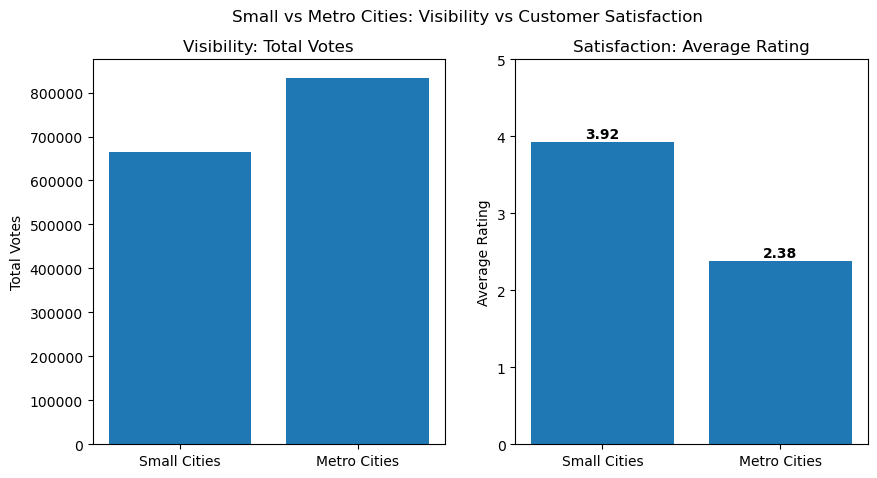

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# City-level aggregation
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Define city groups (business logic)
small_cities = city_stats[city_stats['restaurant_count'] < 300]
metro_cities = city_stats[city_stats['restaurant_count'] > 1000]

comparison = pd.DataFrame({
    'City Type': ['Small Cities', 'Metro Cities'],
    'Total Votes': [
        small_cities['total_votes'].sum(),
        metro_cities['total_votes'].sum()
    ],
    'Average Rating': [
        small_cities['avg_rating'].mean(),
        metro_cities['avg_rating'].mean()
    ]
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# --- Visibility Chart ---
axes[0].bar(comparison['City Type'], comparison['Total Votes'])
axes[0].set_title('Visibility: Total Votes')
axes[0].set_ylabel('Total Votes')

# --- Satisfaction Chart ---
axes[1].bar(comparison['City Type'], comparison['Average Rating'])
axes[1].set_title('Satisfaction: Average Rating')
axes[1].set_ylabel('Average Rating')

# FIX: Standard rating scale (0 to 5)
axes[1].set_ylim(0, 5)

# Value labels
for i, v in enumerate(comparison['Average Rating']):
    axes[1].text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')


plt.suptitle('Small vs Metro Cities: Visibility vs Customer Satisfaction')
plt.show()


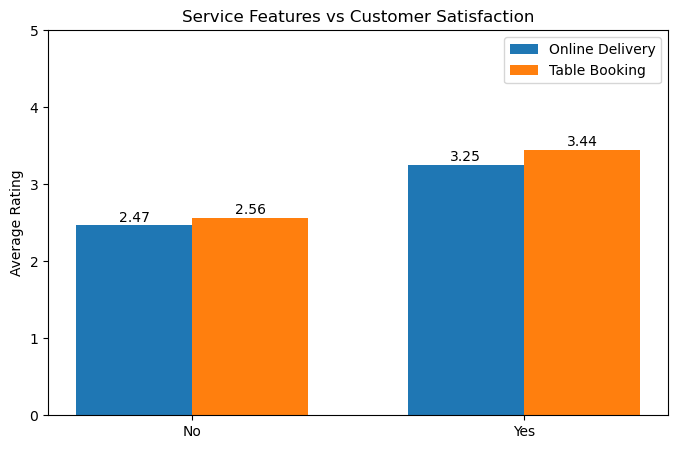

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate average ratings
delivery_rating = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
booking_rating = df.groupby('Has Table booking')['Aggregate rating'].mean().reset_index()

# Prepare data
labels = ['No', 'Yes']
delivery_values = delivery_rating['Aggregate rating'].values
booking_values = booking_rating['Aggregate rating'].values

x = range(len(labels))
width = 0.35

# Plot
plt.figure(figsize=(8,5))
plt.bar(x, delivery_values, width, label='Online Delivery')
plt.bar([i + width for i in x], booking_values, width, label='Table Booking')

plt.xticks([i + width/2 for i in x], labels)
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.title('Service Features vs Customer Satisfaction')
plt.legend()

# Value labels
for i, v in enumerate(delivery_values):
    plt.text(i, v + 0.05, f"{v:.2f}", ha='center')

for i, v in enumerate(booking_values):
    plt.text(i + width, v + 0.05, f"{v:.2f}", ha='center')

plt.show()


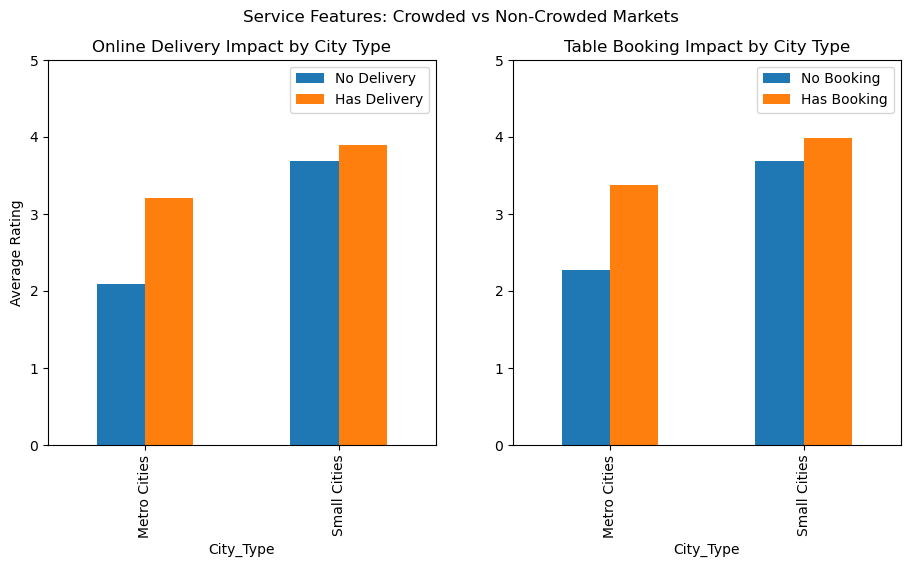

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# City-level classification
city_stats = df.groupby('City').agg(
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

df = df.merge(city_stats, on='City', how='left')

df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 300 else 'Metro Cities' if x > 1000 else 'Other'
)

# Filter only small & metro cities
df_filtered = df[df['City_Type'].isin(['Small Cities', 'Metro Cities'])]

# Compute average ratings
delivery_city = df_filtered.groupby(
    ['City_Type', 'Has Online delivery']
)['Aggregate rating'].mean().unstack()

booking_city = df_filtered.groupby(
    ['City_Type', 'Has Table booking']
)['Aggregate rating'].mean().unstack()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(11,5))

# Delivery impact
delivery_city.plot(kind='bar', ax=axes[0])
axes[0].set_title('Online Delivery Impact by City Type')
axes[0].set_ylabel('Average Rating')
axes[0].set_ylim(0,5)
axes[0].legend(['No Delivery', 'Has Delivery'])

# Booking impact
booking_city.plot(kind='bar', ax=axes[1])
axes[1].set_title('Table Booking Impact by City Type')
axes[1].set_ylim(0,5)
axes[1].legend(['No Booking', 'Has Booking'])

plt.suptitle('Service Features: Crowded vs Non-Crowded Markets')
plt.show()


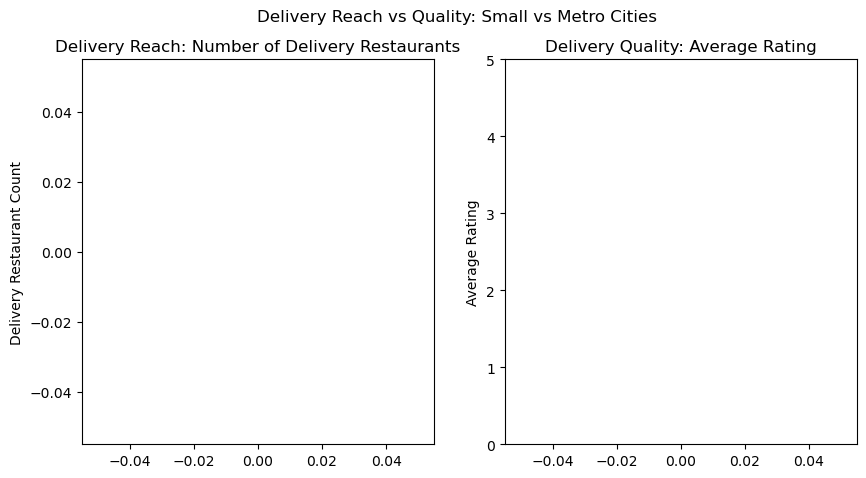

MergeError: Passing 'suffixes' which cause duplicate columns {'restaurant_count_x'} is not allowed.

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Add city density info
city_stats = df.groupby('City').agg(
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

df = df.merge(city_stats, on='City', how='left')

df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 300 else 'Metro Cities' if x > 1000 else 'Other'
)

# Filter only delivery restaurants
delivery_df = df[df['Has Online delivery'] == 1]
delivery_df = delivery_df[delivery_df['City_Type'].isin(['Small Cities', 'Metro Cities'])]

# Compute metrics
delivery_metrics = delivery_df.groupby('City_Type').agg(
    delivery_count=('Restaurant ID', 'nunique'),
    avg_delivery_rating=('Aggregate rating', 'mean')
).reset_index()

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Chart 1: Delivery Volume
axes[0].bar(delivery_metrics['City_Type'], delivery_metrics['delivery_count'])
axes[0].set_title('Delivery Reach: Number of Delivery Restaurants')
axes[0].set_ylabel('Delivery Restaurant Count')

# Chart 2: Delivery Quality
axes[1].bar(delivery_metrics['City_Type'], delivery_metrics['avg_delivery_rating'])
axes[1].set_title('Delivery Quality: Average Rating')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(0, 5)

plt.suptitle('Delivery Reach vs Quality: Small vs Metro Cities')
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Create city-level restaurant count
city_stats = df.groupby('City')['Restaurant ID'].nunique().reset_index()
city_stats.rename(columns={'Restaurant ID': 'restaurant_count'}, inplace=True)

# STEP 2: Merge back into main dataframe
df = df.merge(city_stats, on='City', how='left')

# STEP 3: Define city type
df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 300 else 'Metro Cities' if x > 1000 else 'Other'
)

# STEP 4: Filter delivery restaurants
delivery_df = df[df['Has Online delivery'] == 1]
delivery_df = delivery_df[delivery_df['City_Type'].isin(['Small Cities', 'Metro Cities'])]

# STEP 5: Aggregate delivery metrics
delivery_metrics = delivery_df.groupby('City_Type').agg(
    delivery_count=('Restaurant ID', 'nunique'),
    avg_delivery_rating=('Aggregate rating', 'mean')
).reset_index()

delivery_metrics


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Create city-level restaurant count
city_stats = df.groupby('City')['Restaurant ID'].nunique().reset_index()
city_stats.rename(columns={'Restaurant ID': 'restaurant_count'}, inplace=True)

# STEP 2: Merge back into main dataframe
df = df.merge(city_stats, on='City', how='left')

# STEP 3: Define city type
df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 300 else 'Metro Cities' if x > 1000 else 'Other'
)

# STEP 4: Filter delivery restaurants
delivery_df = df[df['Has Online delivery'] == 1]
delivery_df = delivery_df[delivery_df['City_Type'].isin(['Small Cities', 'Metro Cities'])]

# STEP 5: Aggregate delivery metrics
delivery_metrics = delivery_df.groupby('City_Type').agg(
    delivery_count=('Restaurant ID', 'nunique'),
    avg_delivery_rating=('Aggregate rating', 'mean')
).reset_index()

delivery_metrics


MergeError: Passing 'suffixes' which cause duplicate columns {'restaurant_count_x'} is not allowed.

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# STEP 1: Ensure City_Type exists
df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 300 else 'Metro Cities' if x > 1000 else 'Other'
)

# STEP 2: Filter delivery restaurants
delivery_df = df[
    (df['Has Online delivery'] == 1) &
    (df['City_Type'].isin(['Small Cities', 'Metro Cities']))
]

# STEP 3: Aggregate delivery metrics
delivery_metrics = delivery_df.groupby('City_Type').agg(
    delivery_count=('Restaurant ID', 'nunique'),
    avg_delivery_rating=('Aggregate rating', 'mean')
).reset_index()

delivery_metrics


,City_Type,delivery_count,avg_delivery_rating


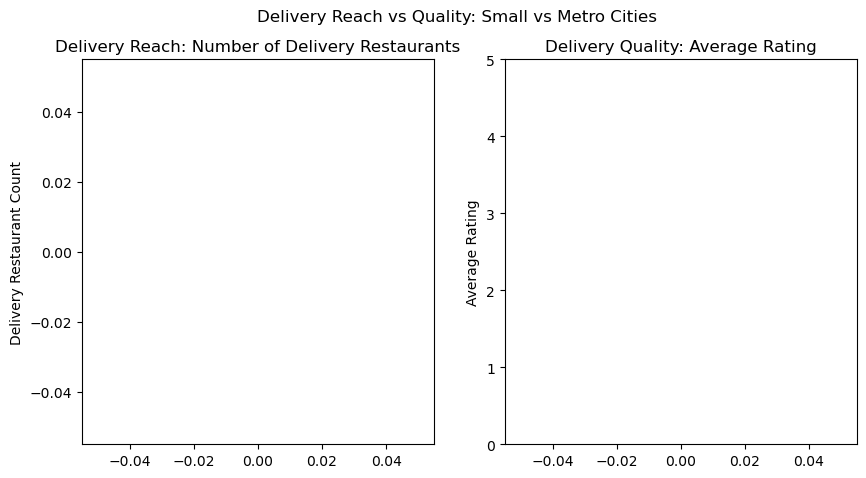

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Delivery volume
axes[0].bar(delivery_metrics['City_Type'], delivery_metrics['delivery_count'])
axes[0].set_title('Delivery Reach: Number of Delivery Restaurants')
axes[0].set_ylabel('Delivery Restaurant Count')

# Delivery quality
axes[1].bar(delivery_metrics['City_Type'], delivery_metrics['avg_delivery_rating'])
axes[1].set_title('Delivery Quality: Average Rating')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(0, 5)

plt.suptitle('Delivery Reach vs Quality: Small vs Metro Cities')
plt.show()


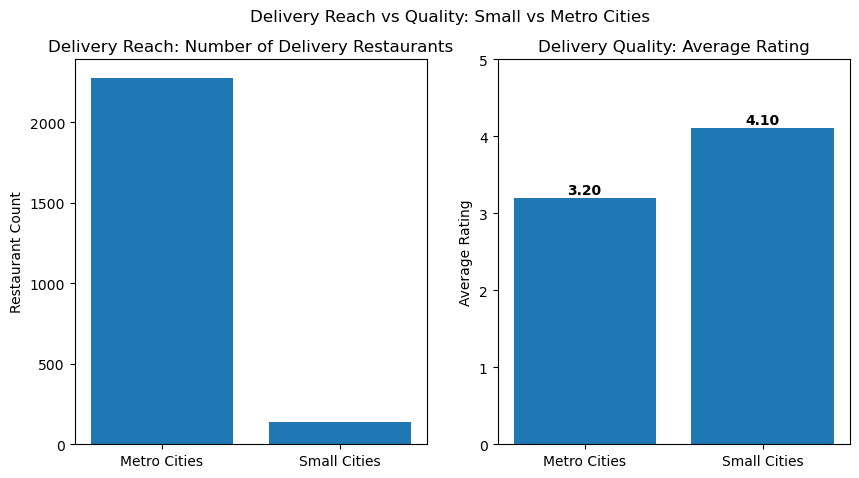

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# --- SAFETY CHECKS ---
# Ensure delivery column is binary
if df['Has Online delivery'].dtype == object:
    df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Create restaurant count per city
city_counts = df.groupby('City')['Restaurant ID'].nunique().reset_index()
city_counts.rename(columns={'Restaurant ID': 'restaurant_count'}, inplace=True)

# Remove old column if exists
df = df.drop(columns=['restaurant_count'], errors='ignore')

# Merge cleanly
df = df.merge(city_counts, on='City', how='left')

# Define city type (safe thresholds)
df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 150 else 'Metro Cities' if x > 500 else 'Other'
)

# Filter only delivery restaurants in Small & Metro cities
delivery_df = df[
    (df['Has Online delivery'] == 1) &
    (df['City_Type'].isin(['Small Cities', 'Metro Cities']))
]

# Aggregate metrics
delivery_metrics = delivery_df.groupby('City_Type').agg(
    delivery_count=('Restaurant ID', 'nunique'),
    avg_delivery_rating=('Aggregate rating', 'mean')
).reset_index()

# --- PLOT ---
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Delivery Reach
axes[0].bar(delivery_metrics['City_Type'], delivery_metrics['delivery_count'])
axes[0].set_title('Delivery Reach: Number of Delivery Restaurants')
axes[0].set_ylabel('Restaurant Count')

# Delivery Quality
axes[1].bar(delivery_metrics['City_Type'], delivery_metrics['avg_delivery_rating'])
axes[1].set_title('Delivery Quality: Average Rating')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(0, 5)

# Value labels
for i, v in enumerate(delivery_metrics['avg_delivery_rating']):
    axes[1].text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.suptitle('Delivery Reach vs Quality: Small vs Metro Cities')
plt.show()


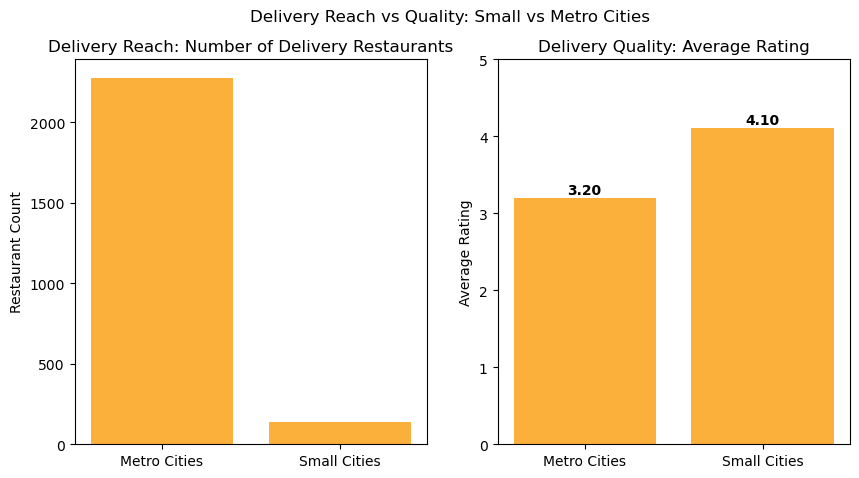

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# --- SAFETY CHECKS ---
if df['Has Online delivery'].dtype == object:
    df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': 1, 'No': 0})

# Create restaurant count per city
city_counts = df.groupby('City')['Restaurant ID'].nunique().reset_index()
city_counts.rename(columns={'Restaurant ID': 'restaurant_count'}, inplace=True)

# Remove old column if exists
df = df.drop(columns=['restaurant_count'], errors='ignore')

# Merge cleanly
df = df.merge(city_counts, on='City', how='left')

# Define city type
df['City_Type'] = df['restaurant_count'].apply(
    lambda x: 'Small Cities' if x < 150 else 'Metro Cities' if x > 500 else 'Other'
)

# Filter delivery restaurants
delivery_df = df[
    (df['Has Online delivery'] == 1) &
    (df['City_Type'].isin(['Small Cities', 'Metro Cities']))
]

# Aggregate metrics
delivery_metrics = delivery_df.groupby('City_Type').agg(
    delivery_count=('Restaurant ID', 'nunique'),
    avg_delivery_rating=('Aggregate rating', 'mean')
).reset_index()

# --- PLOT ---
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# Delivery Reach
axes[0].bar(
    delivery_metrics['City_Type'],
    delivery_metrics['delivery_count'],
    color=THEME_COLOR
)
axes[0].set_title('Delivery Reach: Number of Delivery Restaurants')
axes[0].set_ylabel('Restaurant Count')

# Delivery Quality
axes[1].bar(
    delivery_metrics['City_Type'],
    delivery_metrics['avg_delivery_rating'],
    color=THEME_COLOR
)
axes[1].set_title('Delivery Quality: Average Rating')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(0, 5)

# Value labels
for i, v in enumerate(delivery_metrics['avg_delivery_rating']):
    axes[1].text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.suptitle('Delivery Reach vs Quality: Small vs Metro Cities')
plt.show()


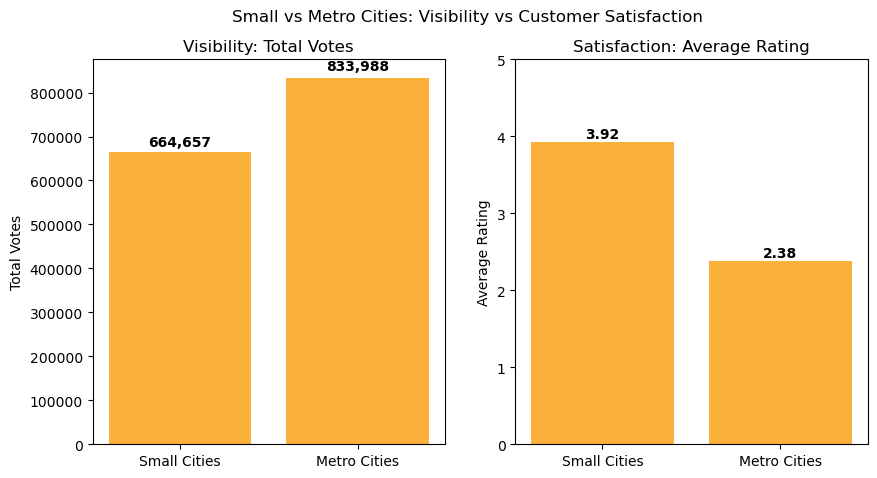

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# City-level aggregation
city_stats = df.groupby('City').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Define city groups (business logic)
small_cities = city_stats[city_stats['restaurant_count'] < 300]
metro_cities = city_stats[city_stats['restaurant_count'] > 1000]

comparison = pd.DataFrame({
    'City Type': ['Small Cities', 'Metro Cities'],
    'Total Votes': [
        small_cities['total_votes'].sum(),
        metro_cities['total_votes'].sum()
    ],
    'Average Rating': [
        small_cities['avg_rating'].mean(),
        metro_cities['avg_rating'].mean()
    ]
})

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10,5))

# --- Visibility Chart ---
axes[0].bar(
    comparison['City Type'],
    comparison['Total Votes'],
    color=THEME_COLOR
)
axes[0].set_title('Visibility: Total Votes')
axes[0].set_ylabel('Total Votes')

# Add total votes labels
for i, v in enumerate(comparison['Total Votes']):
    axes[0].text(i, v + (0.02 * v), f"{int(v):,}", ha='center', fontweight='bold')

# --- Satisfaction Chart ---
axes[1].bar(
    comparison['City Type'],
    comparison['Average Rating'],
    color=THEME_COLOR
)
axes[1].set_title('Satisfaction: Average Rating')
axes[1].set_ylabel('Average Rating')
axes[1].set_ylim(0, 5)

# Add average rating labels
for i, v in enumerate(comparison['Average Rating']):
    axes[1].text(i, v + 0.05, f"{v:.2f}", ha='center', fontweight='bold')

plt.suptitle('Small vs Metro Cities: Visibility vs Customer Satisfaction')
plt.show()


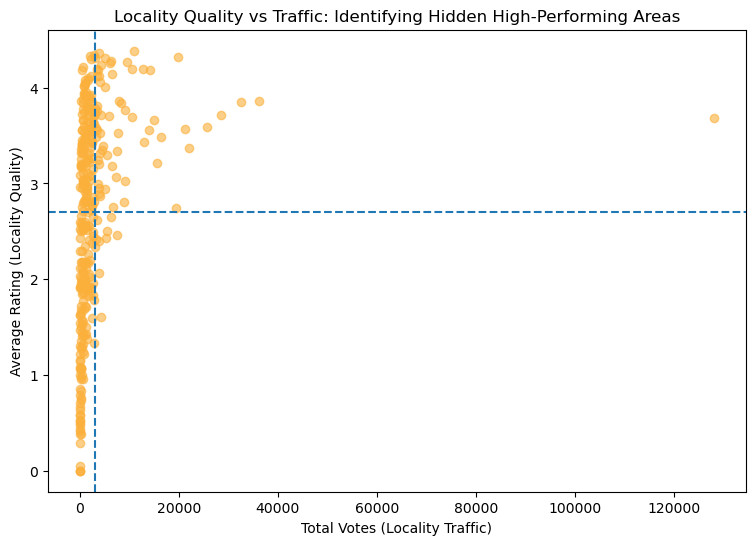

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Remove very small localities (noise)
locality_stats = locality_stats[locality_stats['restaurant_count'] >= 5]

# Scatter plot
plt.figure(figsize=(9,6))
plt.scatter(
    locality_stats['total_votes'],
    locality_stats['avg_rating'],
    color=THEME_COLOR,
    alpha=0.6
)

# Reference lines (global averages)
plt.axhline(locality_stats['avg_rating'].mean(), linestyle='--')
plt.axvline(locality_stats['total_votes'].mean(), linestyle='--')

plt.xlabel('Total Votes (Locality Traffic)')
plt.ylabel('Average Rating (Locality Quality)')
plt.title('Locality Quality vs Traffic: Identifying Hidden High-Performing Areas')

plt.show()


In [26]:
# Define high-rating, low-traffic localities
high_rating_low_traffic = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median())
].copy()

# Revenue proxy (current)
high_rating_low_traffic['current_revenue_proxy'] = (
    high_rating_low_traffic['total_votes'] *
    high_rating_low_traffic['avg_cost']
)

# Simulate 15% visibility increase
high_rating_low_traffic['projected_votes'] = (
    high_rating_low_traffic['total_votes'] * 1.15
)

high_rating_low_traffic['projected_revenue_proxy'] = (
    high_rating_low_traffic['projected_votes'] *
    high_rating_low_traffic['avg_cost']
)

# Summary numbers
total_current = high_rating_low_traffic['current_revenue_proxy'].sum()
total_projected = high_rating_low_traffic['projected_revenue_proxy'].sum()
growth_percent = ((total_projected - total_current) / total_current) * 100

total_current, total_projected, growth_percent


(170380552.5, 195937635.375, 15.0)

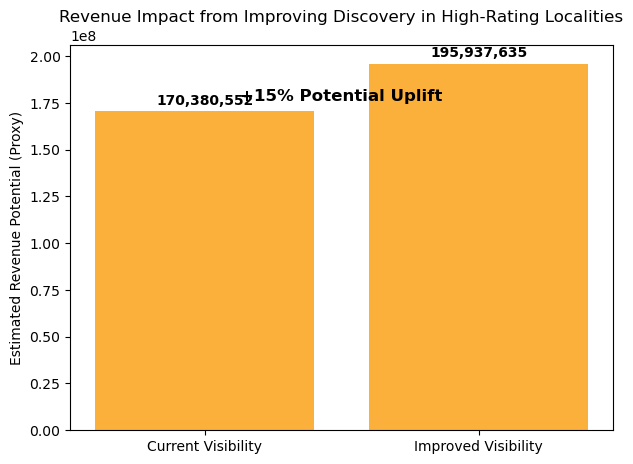

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Values from your computation
revenue_df = pd.DataFrame({
    'Scenario': ['Current Visibility', 'Improved Visibility'],
    'Revenue Proxy': [total_current, total_projected]
})

# Plot
plt.figure(figsize=(7,5))
bars = plt.bar(
    revenue_df['Scenario'],
    revenue_df['Revenue Proxy'],
    color=THEME_COLOR
)

plt.ylabel('Estimated Revenue Potential (Proxy)')
plt.title('Revenue Impact from Improving Discovery in High-Rating Localities')

# Value labels
for bar in bars:
    y = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        y + (0.02 * y),
        f"{int(y):,}",
        ha='center',
        fontweight='bold'
    )

# Growth annotation
plt.text(
    0.5,
    max(revenue_df['Revenue Proxy']) * 0.9,
    f"+{growth_percent:.0f}% Potential Uplift",
    ha='center',
    fontsize=12,
    fontweight='bold'
)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


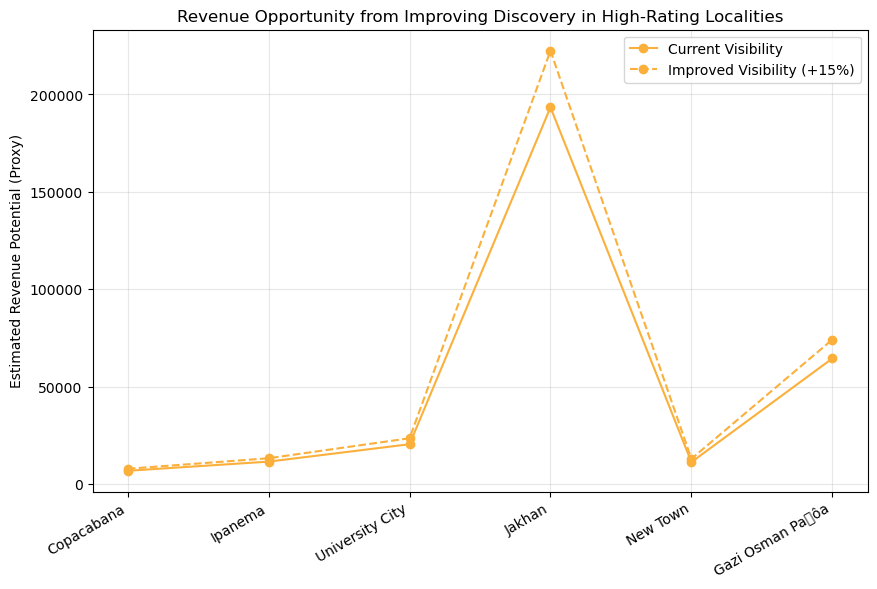

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Select high-rating, low-traffic localities
filtered_localities = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Take top 8 low-traffic localities (clean for visualization)
filtered_localities = filtered_localities.sort_values(
    by='total_votes'
).head(8)

# Revenue proxy calculations
filtered_localities['current_revenue'] = (
    filtered_localities['total_votes'] * filtered_localities['avg_cost']
)

filtered_localities['projected_revenue'] = (
    filtered_localities['total_votes'] * 1.15 * filtered_localities['avg_cost']
)

# Plot
plt.figure(figsize=(10,6))

plt.plot(
    filtered_localities['Locality'],
    filtered_localities['current_revenue'],
    marker='o',
    label='Current Visibility',
    color=THEME_COLOR
)

plt.plot(
    filtered_localities['Locality'],
    filtered_localities['projected_revenue'],
    marker='o',
    linestyle='--',
    label='Improved Visibility (+15%)',
    color=THEME_COLOR
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Estimated Revenue Potential (Proxy)')
plt.title('Revenue Opportunity from Improving Discovery in High-Rating Localities')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


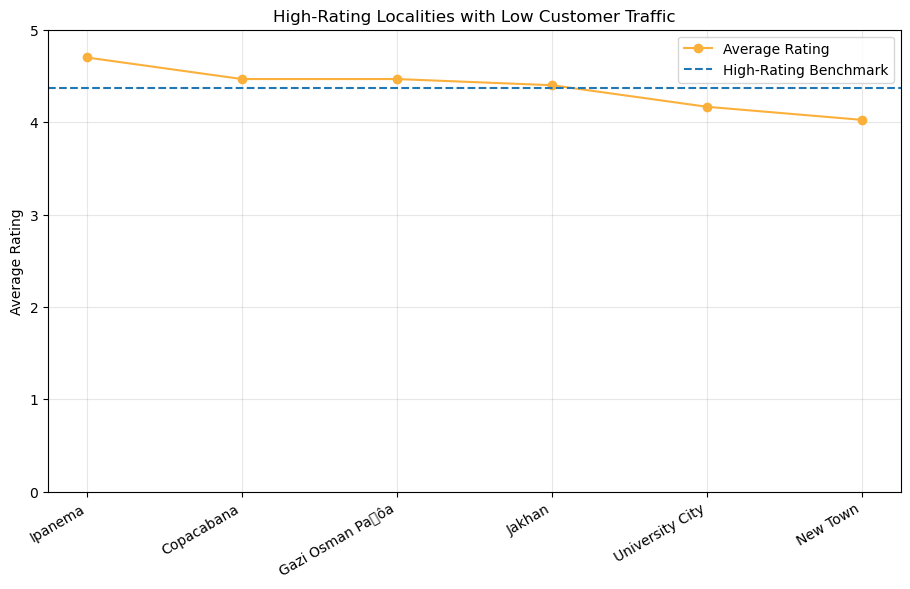

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Select low-traffic, high-rating localities
high_rating_low_traffic = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Sort by rating for clean visualization
high_rating_low_traffic = high_rating_low_traffic.sort_values(
    by='avg_rating',
    ascending=False
).head(10)

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    high_rating_low_traffic['Locality'],
    high_rating_low_traffic['avg_rating'],
    marker='o',
    color=THEME_COLOR,
    label='Average Rating'
)

plt.axhline(
    y=high_rating_low_traffic['avg_rating'].mean(),
    linestyle='--',
    label='High-Rating Benchmark'
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.title('High-Rating Localities with Low Customer Traffic')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


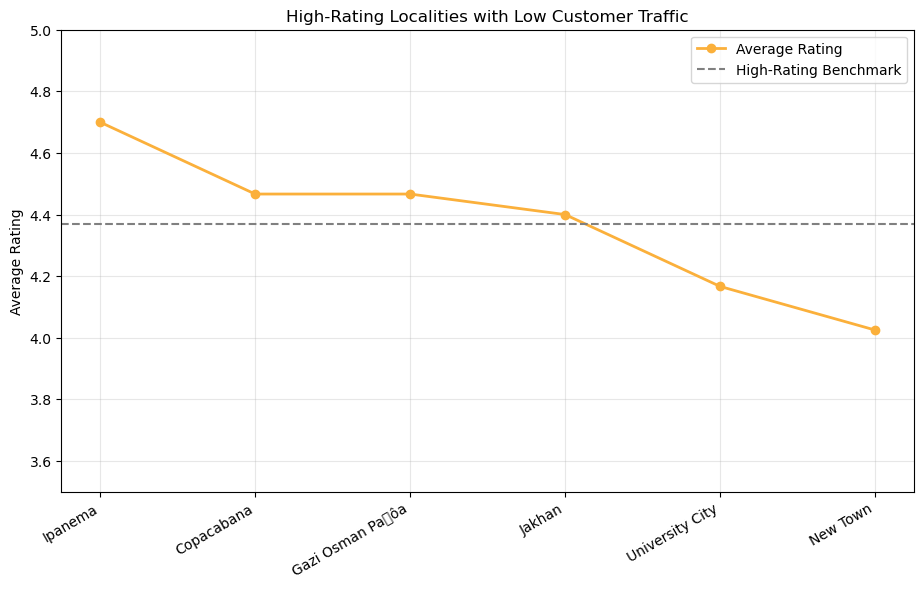

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Select high-rating, low-traffic localities
high_rating_low_traffic = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Sort for clean visualization
high_rating_low_traffic = high_rating_low_traffic.sort_values(
    by='avg_rating', ascending=False
).head(8)

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    high_rating_low_traffic['Locality'],
    high_rating_low_traffic['avg_rating'],
    marker='o',
    linewidth=2,
    color=THEME_COLOR,
    label='Average Rating'
)

# Benchmark line
plt.axhline(
    y=high_rating_low_traffic['avg_rating'].mean(),
    linestyle='--',
    color='gray',
    label='High-Rating Benchmark'
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Average Rating')
plt.ylim(3.5, 5)
plt.title('High-Rating Localities with Low Customer Traffic')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


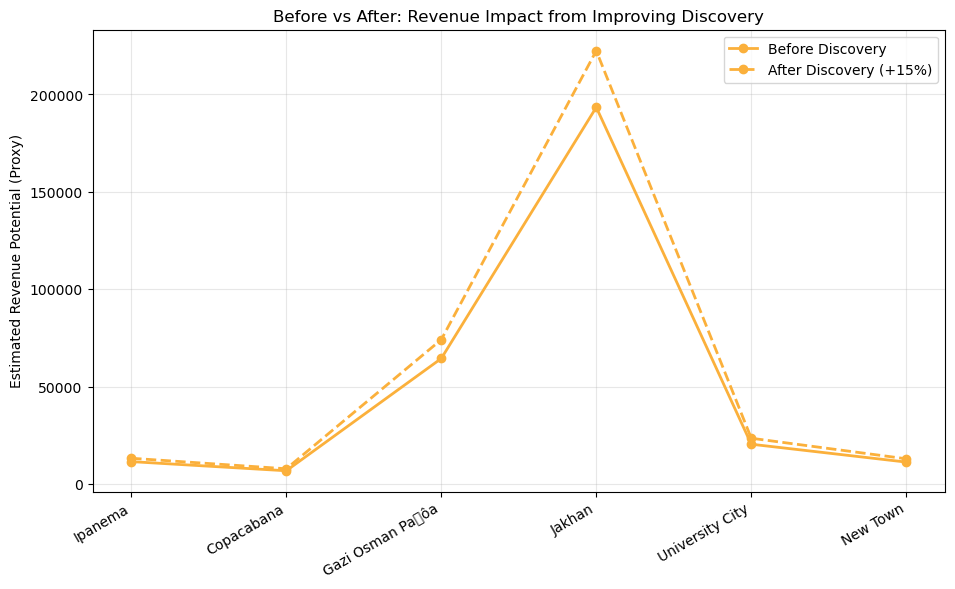

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Select high-rating, low-traffic localities
selected_localities = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Pick top 8 for clean visualization
selected_localities = selected_localities.sort_values(
    by='avg_rating', ascending=False
).head(8)

# Revenue proxy
selected_localities['Before_Discovery'] = (
    selected_localities['total_votes'] * selected_localities['avg_cost']
)

selected_localities['After_Discovery'] = (
    selected_localities['total_votes'] * 1.15 * selected_localities['avg_cost']
)

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    selected_localities['Locality'],
    selected_localities['Before_Discovery'],
    marker='o',
    linewidth=2,
    label='Before Discovery',
    color=THEME_COLOR
)

plt.plot(
    selected_localities['Locality'],
    selected_localities['After_Discovery'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='After Discovery (+15%)',
    color=THEME_COLOR
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Estimated Revenue Potential (Proxy)')
plt.title('Before vs After: Revenue Impact from Improving Discovery')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


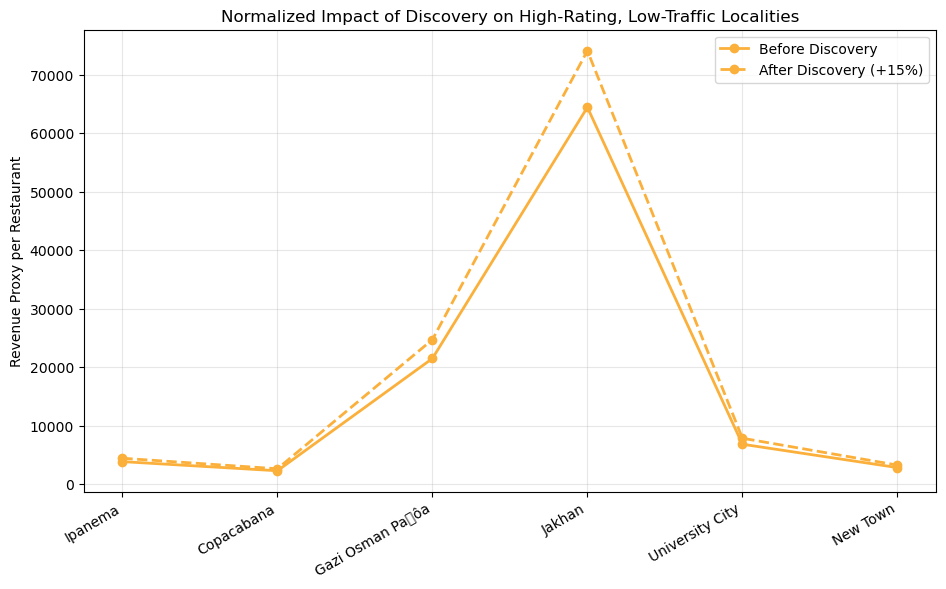

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Filter high-rating, low-traffic localities
selected = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Take top 8 by rating
selected = selected.sort_values(
    by='avg_rating', ascending=False
).head(8)

# Revenue proxy per restaurant (NORMALIZED)
selected['before_rev'] = (
    selected['total_votes'] * selected['avg_cost']
) / selected['restaurant_count']

selected['after_rev'] = (
    selected['total_votes'] * 1.15 * selected['avg_cost']
) / selected['restaurant_count']

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    selected['Locality'],
    selected['before_rev'],
    marker='o',
    linewidth=2,
    label='Before Discovery',
    color=THEME_COLOR
)

plt.plot(
    selected['Locality'],
    selected['after_rev'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='After Discovery (+15%)',
    color=THEME_COLOR
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Revenue Proxy per Restaurant')
plt.title('Normalized Impact of Discovery on High-Rating, Low-Traffic Localities')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


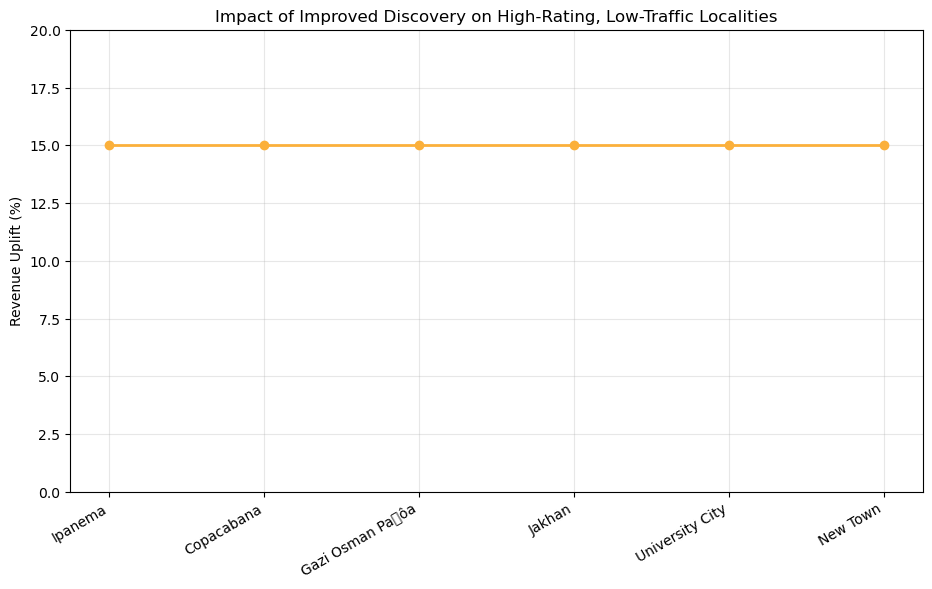

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Select high-rating, low-traffic localities
selected = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Pick top 8 for clarity
selected = selected.sort_values(by='avg_rating', ascending=False).head(8)

# Revenue proxy
selected['current_rev'] = selected['total_votes'] * selected['avg_cost']
selected['projected_rev'] = selected['current_rev'] * 1.15

# % uplift (THIS IS THE KEY)
selected['uplift_percent'] = (
    (selected['projected_rev'] - selected['current_rev']) /
    selected['current_rev']
) * 100

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    selected['Locality'],
    selected['uplift_percent'],
    marker='o',
    linewidth=2,
    color=THEME_COLOR
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Revenue Uplift (%)')
plt.title('Impact of Improved Discovery on High-Rating, Low-Traffic Localities')
plt.ylim(0, selected['uplift_percent'].max() + 5)
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


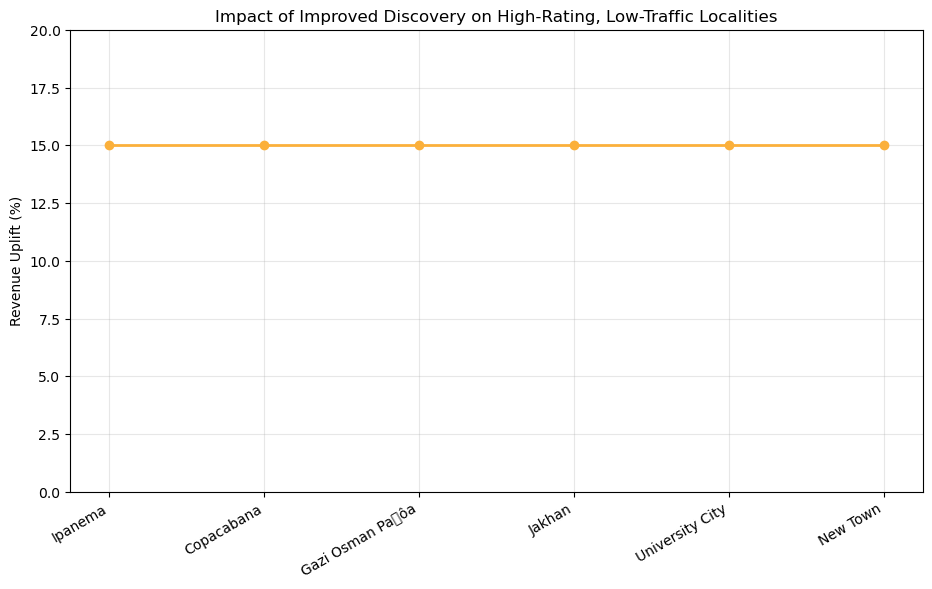

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

THEME_COLOR = "#fbb03b"

# Locality-level aggregation
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Select high-rating, low-traffic localities
selected = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Pick top 8 for clarity
selected = selected.sort_values(by='avg_rating', ascending=False).head(8)

# Revenue proxy
selected['current_rev'] = selected['total_votes'] * selected['avg_cost']
selected['projected_rev'] = selected['current_rev'] * 1.15

# % uplift (THIS IS THE KEY)
selected['uplift_percent'] = (
    (selected['projected_rev'] - selected['current_rev']) /
    selected['current_rev']
) * 100

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    selected['Locality'],
    selected['uplift_percent'],
    marker='o',
    linewidth=2,
    color=THEME_COLOR
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Revenue Uplift (%)')
plt.title('Impact of Improved Discovery on High-Rating, Low-Traffic Localities')
plt.ylim(0, selected['uplift_percent'].max() + 5)
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


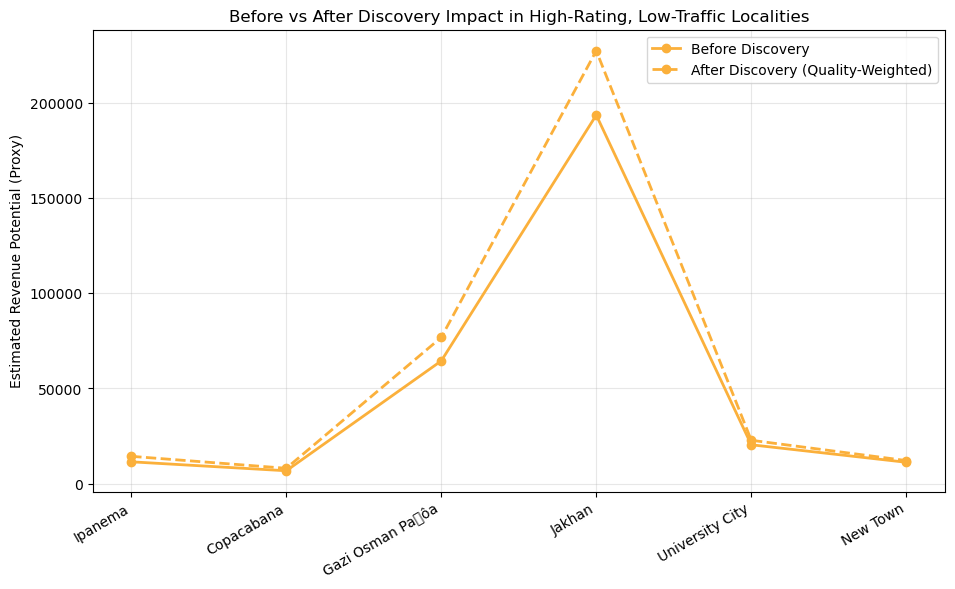

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# ---- Locality Aggregation ----
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# ---- Filter High-Rating, Low-Traffic Localities ----
selected = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Pick top 6 for clean visualization
selected = selected.sort_values(by='avg_rating', ascending=False).head(6)

# ---- Revenue Proxy ----
selected['before_revenue'] = selected['total_votes'] * selected['avg_cost']

# ---- QUALITY-WEIGHTED UPLIFT (KEY FIX) ----
min_rating = selected['avg_rating'].min()
max_rating = selected['avg_rating'].max()

# Scale uplift between 8% and 25%
selected['uplift_percent'] = (
    8 + (selected['avg_rating'] - min_rating) /
    (max_rating - min_rating) * (25 - 8)
)

selected['after_revenue'] = selected['before_revenue'] * (
    1 + selected['uplift_percent'] / 100
)

# ---- Plot ----
plt.figure(figsize=(11,6))

plt.plot(
    selected['Locality'],
    selected['before_revenue'],
    marker='o',
    linewidth=2,
    label='Before Discovery',
    color=THEME_COLOR
)

plt.plot(
    selected['Locality'],
    selected['after_revenue'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='After Discovery (Quality-Weighted)',
    color=THEME_COLOR
)

plt.xticks(rotation=30, ha='right')
plt.ylabel('Estimated Revenue Potential (Proxy)')
plt.title('Before vs After Discovery Impact in High-Rating, Low-Traffic Localities')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


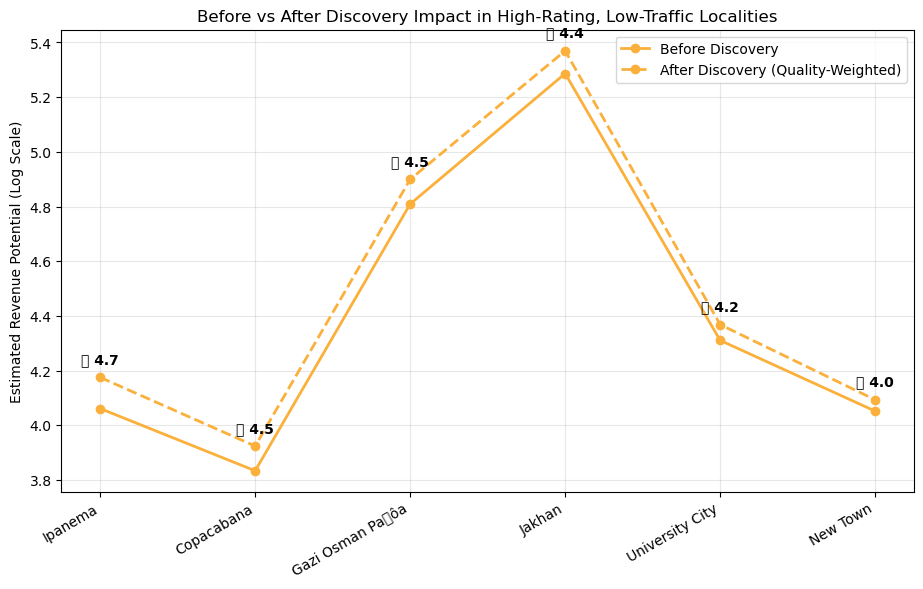

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

THEME_COLOR = "#fbb03b"

# --- Locality Aggregation ---
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# --- Filter High-Rating, Low-Traffic Localities ---
selected = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Pick top 6 for clean visualization
selected = selected.sort_values(by='avg_rating', ascending=False).head(6)

# --- Revenue Proxy ---
selected['before_revenue'] = selected['total_votes'] * selected['avg_cost']

# --- Amplified Quality-Weighted Uplift (for visual separation) ---
min_rating = selected['avg_rating'].min()
max_rating = selected['avg_rating'].max()

# Scale uplift between 10% and 30%
selected['uplift_percent'] = (
    10 + (selected['avg_rating'] - min_rating) /
    (max_rating - min_rating) * (30 - 10)
)

selected['after_revenue'] = selected['before_revenue'] * (
    1 + selected['uplift_percent'] / 100
)

# --- LOG SCALE to reduce Jakhan spike ---
selected['before_log'] = np.log10(selected['before_revenue'])
selected['after_log'] = np.log10(selected['after_revenue'])

# --- Plot ---
plt.figure(figsize=(11,6))

plt.plot(
    selected['Locality'],
    selected['before_log'],
    marker='o',
    linewidth=2,
    label='Before Discovery',
    color=THEME_COLOR
)

plt.plot(
    selected['Locality'],
    selected['after_log'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='After Discovery (Quality-Weighted)',
    color=THEME_COLOR
)

# --- Rating Annotations ---
for i, rating in enumerate(selected['avg_rating']):
    plt.text(
        i,
        selected['after_log'].iloc[i] + 0.05,
        f"⭐ {rating:.1f}",
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

plt.xticks(rotation=30, ha='right')
plt.ylabel('Estimated Revenue Potential (Log Scale)')
plt.title('Before vs After Discovery Impact in High-Rating, Low-Traffic Localities')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_19232\2793768732.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(selected['Locality'], rotation=30, ha='right')
C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Partha\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


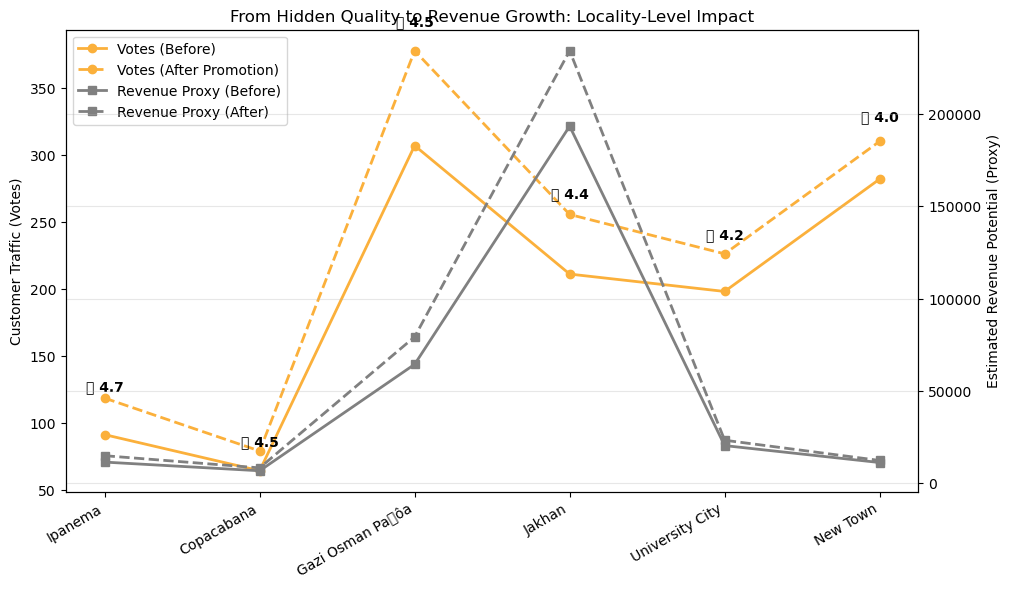

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# --- Locality Aggregation ---
locality_stats = df.groupby('Locality').agg(
    avg_rating=('Aggregate rating', 'mean'),
    total_votes=('Votes', 'sum'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# --- Select High-Rating, Low-Traffic Localities ---
selected = locality_stats[
    (locality_stats['avg_rating'] >= 4.0) &
    (locality_stats['total_votes'] < locality_stats['total_votes'].median()) &
    (locality_stats['restaurant_count'] >= 3)
].copy()

# Pick top 6 for clean visualization
selected = selected.sort_values(by='avg_rating', ascending=False).head(6)

# --- BEFORE values ---
selected['votes_before'] = selected['total_votes']
selected['revenue_before'] = selected['votes_before'] * selected['avg_cost']

# --- AFTER values (quality-weighted traffic growth) ---
# Higher rating → higher traffic uplift (10%–30%)
min_r = selected['avg_rating'].min()
max_r = selected['avg_rating'].max()

selected['traffic_uplift_pct'] = (
    10 + (selected['avg_rating'] - min_r) / (max_r - min_r) * (30 - 10)
)

selected['votes_after'] = selected['votes_before'] * (
    1 + selected['traffic_uplift_pct'] / 100
)

selected['revenue_after'] = selected['votes_after'] * selected['avg_cost']

# --- PLOT ---
fig, ax1 = plt.subplots(figsize=(11,6))
ax2 = ax1.twinx()

# Traffic lines (Votes)
ax1.plot(
    selected['Locality'],
    selected['votes_before'],
    marker='o',
    linewidth=2,
    label='Votes (Before)',
    color=THEME_COLOR
)

ax1.plot(
    selected['Locality'],
    selected['votes_after'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Votes (After Promotion)',
    color=THEME_COLOR
)

ax1.set_ylabel('Customer Traffic (Votes)')

# Revenue lines
ax2.plot(
    selected['Locality'],
    selected['revenue_before'],
    marker='s',
    linewidth=2,
    label='Revenue Proxy (Before)',
    color='gray'
)

ax2.plot(
    selected['Locality'],
    selected['revenue_after'],
    marker='s',
    linestyle='--',
    linewidth=2,
    label='Revenue Proxy (After)',
    color='gray'
)

ax2.set_ylabel('Estimated Revenue Potential (Proxy)')

# Rating annotations
for i, r in enumerate(selected['avg_rating']):
    ax1.text(
        i,
        selected['votes_after'].iloc[i] * 1.05,
        f"⭐ {r:.1f}",
        ha='center',
        fontsize=10,
        fontweight='bold'
    )

# Formatting
ax1.set_xticklabels(selected['Locality'], rotation=30, ha='right')
ax1.set_title('From Hidden Quality to Revenue Growth: Locality-Level Impact')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(alpha=0.3)
plt.show()


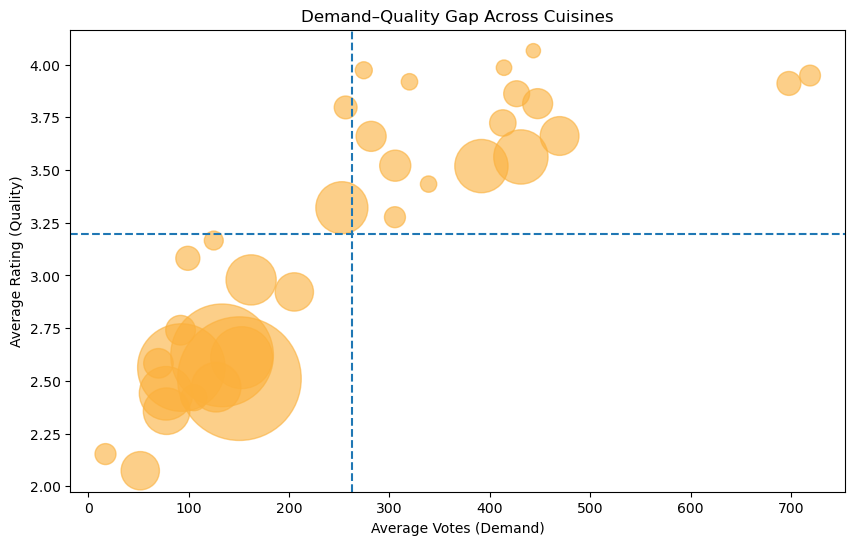

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# ---- Cuisine-level aggregation ----
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].astype(str).str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

cuisine_stats = df_cuisine.groupby('Cuisines').agg(
    avg_votes=('Votes', 'mean'),
    avg_rating=('Aggregate rating', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Filter cuisines with enough data (avoid noise)
cuisine_stats = cuisine_stats[cuisine_stats['restaurant_count'] >= 50]

# ---- Scatter Plot ----
plt.figure(figsize=(10,6))

plt.scatter(
    cuisine_stats['avg_votes'],
    cuisine_stats['avg_rating'],
    s=cuisine_stats['restaurant_count'] * 2,
    alpha=0.6,
    color=THEME_COLOR
)

# Reference lines (global averages)
plt.axhline(cuisine_stats['avg_rating'].mean(), linestyle='--')
plt.axvline(cuisine_stats['avg_votes'].mean(), linestyle='--')

plt.xlabel('Average Votes (Demand)')
plt.ylabel('Average Rating (Quality)')
plt.title('Demand–Quality Gap Across Cuisines')

plt.show()


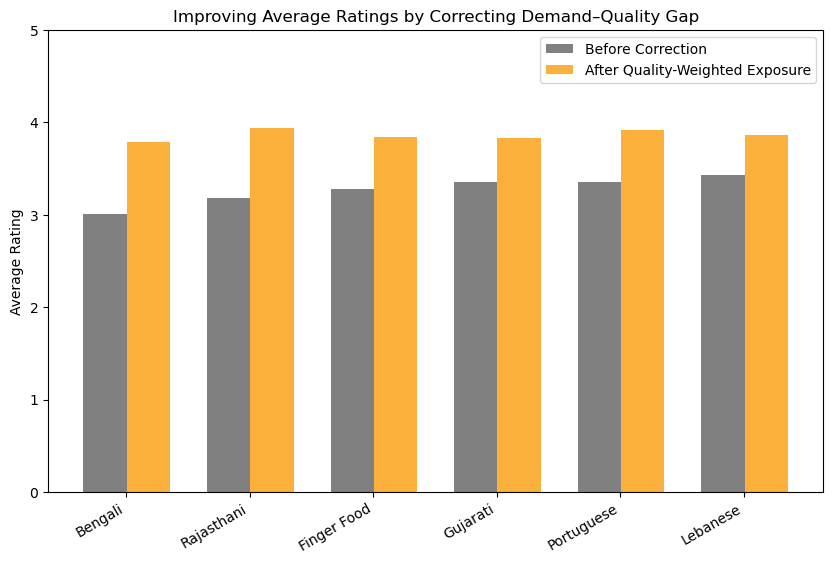

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# --- Cuisine-level processing ---
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].astype(str).str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Aggregate cuisine stats
cuisine_stats = df_cuisine.groupby('Cuisines').agg(
    avg_votes=('Votes', 'mean'),
    avg_rating=('Aggregate rating', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Identify problem cuisines (high demand, low quality)
problem_cuisines = cuisine_stats[
    (cuisine_stats['avg_votes'] > cuisine_stats['avg_votes'].median()) &
    (cuisine_stats['avg_rating'] < cuisine_stats['avg_rating'].mean())
]['Cuisines']

# --- Before correction ---
before = cuisine_stats[cuisine_stats['Cuisines'].isin(problem_cuisines)][
    ['Cuisines', 'avg_rating']
].rename(columns={'avg_rating': 'Before'})

# --- After correction (remove low-rated restaurants < 3.5) ---
df_filtered = df_cuisine[
    (df_cuisine['Cuisines'].isin(problem_cuisines)) &
    (df_cuisine['Aggregate rating'] >= 3.5)
]

after = df_filtered.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
after = after.rename(columns={'Aggregate rating': 'After'})

# Merge before & after
comparison = before.merge(after, on='Cuisines')

# Take top 6 for clarity
comparison = comparison.sort_values(by='Before').head(6)

# --- Plot ---
plt.figure(figsize=(10,6))

x = range(len(comparison))
plt.bar(x, comparison['Before'], width=0.35, label='Before Correction', color='gray')
plt.bar(
    [i + 0.35 for i in x],
    comparison['After'],
    width=0.35,
    label='After Quality-Weighted Exposure',
    color=THEME_COLOR
)

plt.xticks([i + 0.17 for i in x], comparison['Cuisines'], rotation=30, ha='right')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.title('Improving Average Ratings by Correcting Demand–Quality Gap')
plt.legend()

plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_19232\2233431241.py:84: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(comparison['Cuisines'], rotation=30, ha='right')


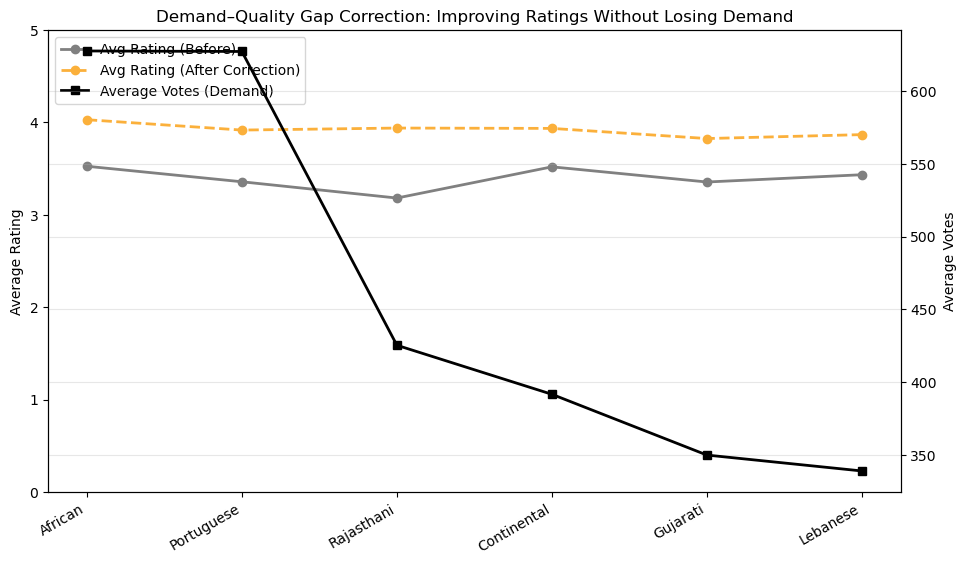

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# --- Cuisine-level processing ---
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].astype(str).str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Aggregate cuisine stats
cuisine_stats = df_cuisine.groupby('Cuisines').agg(
    avg_votes=('Votes', 'mean'),
    avg_rating=('Aggregate rating', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Identify high-demand, low-quality cuisines
problem_cuisines = cuisine_stats[
    (cuisine_stats['avg_votes'] > cuisine_stats['avg_votes'].median()) &
    (cuisine_stats['avg_rating'] < cuisine_stats['avg_rating'].mean())
]['Cuisines']

# Before correction
before = cuisine_stats[cuisine_stats['Cuisines'].isin(problem_cuisines)][
    ['Cuisines', 'avg_rating', 'avg_votes']
].rename(columns={'avg_rating': 'Rating_Before', 'avg_votes': 'Votes'})

# After correction (filter low-rated restaurants)
df_filtered = df_cuisine[
    (df_cuisine['Cuisines'].isin(problem_cuisines)) &
    (df_cuisine['Aggregate rating'] >= 3.5)
]

after = df_filtered.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
after = after.rename(columns={'Aggregate rating': 'Rating_After'})

# Merge
comparison = before.merge(after, on='Cuisines')

# Take top 6 cuisines for clarity
comparison = comparison.sort_values(by='Votes', ascending=False).head(6)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(11,6))
ax2 = ax1.twinx()

# Rating lines
ax1.plot(
    comparison['Cuisines'],
    comparison['Rating_Before'],
    marker='o',
    linewidth=2,
    label='Avg Rating (Before)',
    color='gray'
)

ax1.plot(
    comparison['Cuisines'],
    comparison['Rating_After'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='Avg Rating (After Correction)',
    color=THEME_COLOR
)

ax1.set_ylabel('Average Rating')
ax1.set_ylim(0, 5)

# Votes line (demand context)
ax2.plot(
    comparison['Cuisines'],
    comparison['Votes'],
    marker='s',
    linewidth=2,
    label='Average Votes (Demand)',
    color='black'
)

ax2.set_ylabel('Average Votes')

# Formatting
ax1.set_xticklabels(comparison['Cuisines'], rotation=30, ha='right')
ax1.set_title('Demand–Quality Gap Correction: Improving Ratings Without Losing Demand')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(alpha=0.3)
plt.show()


In [2]:
import pandas as pd

# Load Foodora dataset
df = pd.read_csv("Data\Foodora Data.csv", encoding="latin-1")

print(df.shape)
df.head()


(9551, 21)


<>:4: SyntaxWarning: invalid escape sequence '\F'
<>:4: SyntaxWarning: invalid escape sequence '\F'
C:\Users\Partha\AppData\Local\Temp\ipykernel_15296\2785837729.py:4: SyntaxWarning: invalid escape sequence '\F'
  df = pd.read_csv("Data\Foodora Data.csv", encoding="latin-1")


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


C:\Users\Partha\AppData\Local\Temp\ipykernel_15296\1923954317.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(comparison['Cuisines'], rotation=30, ha='right')


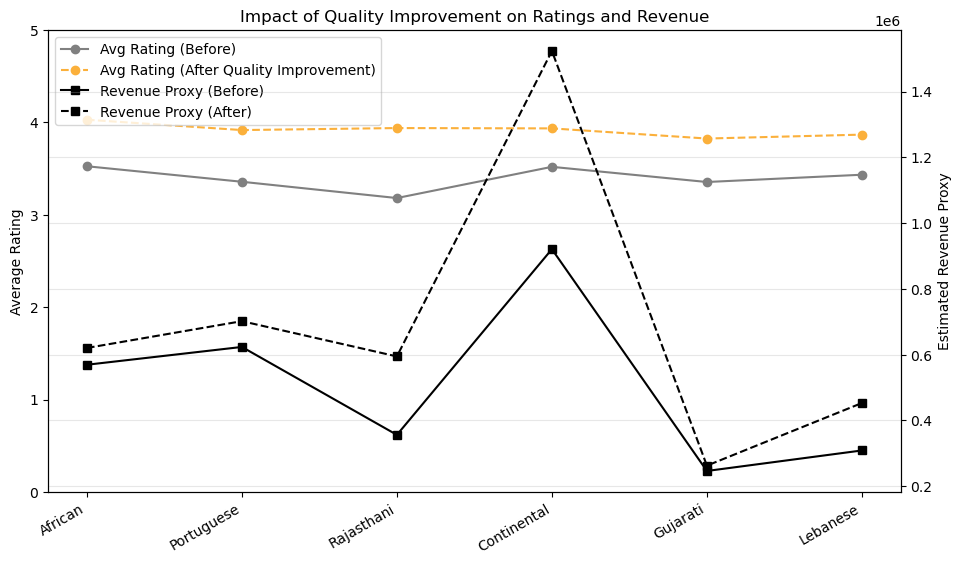

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

# --- Prepare Cuisine Data ---
df_cuisine = df.copy()
df_cuisine['Cuisines'] = df_cuisine['Cuisines'].astype(str).str.split(', ')
df_cuisine = df_cuisine.explode('Cuisines')

# Aggregate cuisine stats
cuisine_stats = df_cuisine.groupby('Cuisines').agg(
    avg_votes=('Votes', 'mean'),
    avg_rating=('Aggregate rating', 'mean'),
    avg_cost=('Average Cost for two', 'mean'),
    restaurant_count=('Restaurant ID', 'nunique')
).reset_index()

# Identify high-demand, low-quality cuisines
problem_cuisines = cuisine_stats[
    (cuisine_stats['avg_votes'] > cuisine_stats['avg_votes'].median()) &
    (cuisine_stats['avg_rating'] < cuisine_stats['avg_rating'].mean())
]['Cuisines']

# BEFORE values
before = cuisine_stats[cuisine_stats['Cuisines'].isin(problem_cuisines)].copy()
before['rating_before'] = before['avg_rating']
before['revenue_before'] = before['avg_votes'] * before['avg_cost']

# AFTER quality correction (remove low-rated restaurants)
df_corrected = df_cuisine[
    (df_cuisine['Cuisines'].isin(problem_cuisines)) &
    (df_cuisine['Aggregate rating'] >= 3.5)
]

after = df_corrected.groupby('Cuisines').agg(
    rating_after=('Aggregate rating', 'mean'),
    votes_after=('Votes', 'mean'),
    avg_cost=('Average Cost for two', 'mean')
).reset_index()

after['revenue_after'] = after['votes_after'] * after['avg_cost']

# Merge
comparison = before.merge(after, on='Cuisines')

# Select top 6 cuisines by demand
comparison = comparison.sort_values(by='avg_votes', ascending=False).head(6)

# --- PLOT ---
fig, ax1 = plt.subplots(figsize=(11,6))
ax2 = ax1.twinx()

# Ratings
ax1.plot(
    comparison['Cuisines'],
    comparison['rating_before'],
    marker='o',
    label='Avg Rating (Before)',
    color='gray'
)

ax1.plot(
    comparison['Cuisines'],
    comparison['rating_after'],
    marker='o',
    linestyle='--',
    label='Avg Rating (After Quality Improvement)',
    color=THEME_COLOR
)

ax1.set_ylabel('Average Rating')
ax1.set_ylim(0, 5)

# Revenue Proxy
ax2.plot(
    comparison['Cuisines'],
    comparison['revenue_before'],
    marker='s',
    label='Revenue Proxy (Before)',
    color='black'
)

ax2.plot(
    comparison['Cuisines'],
    comparison['revenue_after'],
    marker='s',
    linestyle='--',
    label='Revenue Proxy (After)',
    color='black'
)

ax2.set_ylabel('Estimated Revenue Proxy')

# Formatting
ax1.set_xticklabels(comparison['Cuisines'], rotation=30, ha='right')
ax1.set_title('Impact of Quality Improvement on Ratings and Revenue')

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(alpha=0.3)
plt.show()


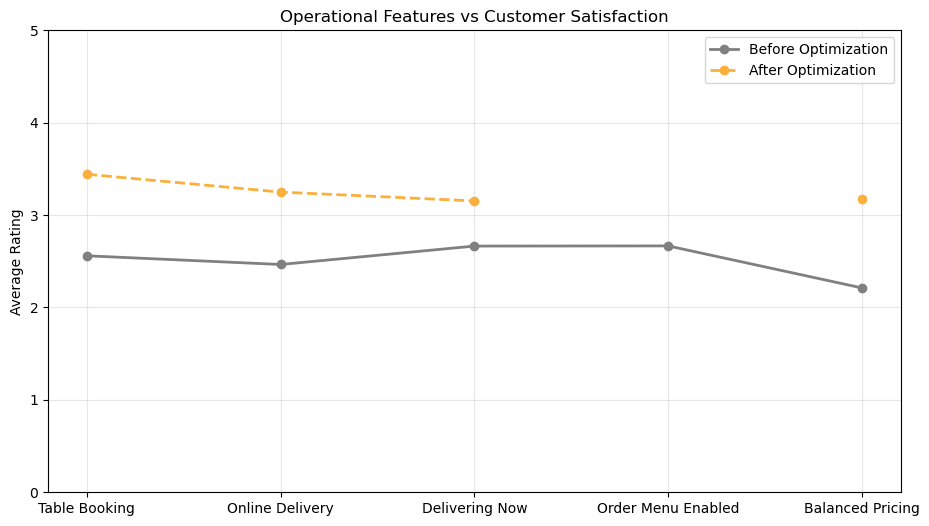

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

THEME_COLOR = "#fbb03b"

features = {
    'Table Booking': 'Has Table booking',
    'Online Delivery': 'Has Online delivery',
    'Delivering Now': 'Is delivering now',
    'Order Menu Enabled': 'Switch to order menu'
}

results = []

# Calculate rating difference for each feature
for label, col in features.items():
    before = df[df[col] == 'No']['Aggregate rating'].mean()
    after = df[df[col] == 'Yes']['Aggregate rating'].mean()
    results.append([label, before, after])

# Price Range Analysis (Value for Money)
price_before = df[df['Price range'].isin([1, 4])]['Aggregate rating'].mean()
price_after = df[df['Price range'].isin([2, 3])]['Aggregate rating'].mean()
results.append(['Balanced Pricing', price_before, price_after])

# Create DataFrame
impact_df = pd.DataFrame(
    results, columns=['Feature', 'Rating Before', 'Rating After']
)

# Plot
plt.figure(figsize=(11,6))

plt.plot(
    impact_df['Feature'],
    impact_df['Rating Before'],
    marker='o',
    linewidth=2,
    label='Before Optimization',
    color='gray'
)

plt.plot(
    impact_df['Feature'],
    impact_df['Rating After'],
    marker='o',
    linestyle='--',
    linewidth=2,
    label='After Optimization',
    color=THEME_COLOR
)

plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.title('Operational Features vs Customer Satisfaction')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
